### Notes and References
None yet.




In [1]:

#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - Author, Date: Created as copy of Old Notebook (`Old Title`).
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
INCLUDE_DIR = '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils' #@param (type:"string")
PROJECT_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill')
JUPYTER_DIR = os.path.join(PROJECT_DIR,'Colab/Notebooks')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
#pd.options.display.max_columns = 1000
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append(INCLUDE_DIR)
#sys.path.append('.')
import utils

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
---
CWD: /content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab/Notebooks


### Imports

In [2]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import jowilder_utils as jw_util
import feature_utils as feat_util
import urllib.request
from google.colab import files
from io import BytesIO
from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from Workflow import Workflow
from zipfile import ZipFile
import importlib
importlib.reload(feat_util)
importlib.reload(jw_util)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<module 'jowilder_utils' from '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils/jowilder_utils.py'>

### Set Vars

In [3]:
options = None#feat_util.options.lakeland_player_lvl0
print(*str(options).split(','), sep='\n')

None


### Get Data

In [4]:
# LogDF, import_meta = feat_util.getLogDFbyPath([os.path.join(PROJECT_DIR,'data/JOWILDER_20200401_to_20200430_b30a2f3_proc - First 600 rows.csv')], zipped=False)
LogDF, import_meta = feat_util.getZippedLogDFbyURL(['https://opengamedata.fielddaylab.wisc.edu/data/JOWILDER/JOWILDER_20200401_to_20200430_ad4c5fa_proc.zip'])
print(*import_meta,sep='\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (419,420,435,437,438,439,452,453,454) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Import from fhttps://opengamedata.fielddaylab.wisc.edu/data/JOWILDER/JOWILDER_20200401_to_20200430_ad4c5fa_proc.zip


In [5]:
print(LogDF.shape)
LogDF.head()

(28520, 2917)


,Q0_A1,Q0_A1_time,Q0_A2,Q0_A2_time,Q0_A3,Q0_A3_time,Q0_answers,Q0_num_guesses,Q10_A1,Q10_A1_time,Q10_A2,Q10_A2_time,Q10_A3,Q10_A3_time,Q10_answers,Q10_num_guesses,Q11_A1,Q11_A1_time,Q11_A2,Q11_A2_time,Q11_A3,Q11_A3_time,Q11_answers,Q11_num_guesses,Q12_A1,Q12_A1_time,Q12_A2,Q12_A2_time,Q12_A3,Q12_A3_time,Q12_answers,Q12_num_guesses,Q13_A1,Q13_A1_time,Q13_A2,Q13_A2_time,Q13_A3,Q13_A3_time,Q13_answers,Q13_num_guesses,Q14_A1,Q14_A1_time,Q14_A2,Q14_A2_time,Q14_A3,Q14_A3_time,Q14_answers,Q14_num_guesses,Q15_A1,Q15_A1_time,...,obj79_ocount_notebook_uses,obj79_omeaningful_action_count,obj79_onext_int,obj79_onum_enc,obj79_otime_to_next_obj,obj7_ocount_clicks,obj7_ocount_notebook_uses,obj7_omeaningful_action_count,obj7_onext_int,obj7_onum_enc,obj7_otime_to_next_obj,obj8_ocount_clicks,obj8_ocount_notebook_uses,obj8_omeaningful_action_count,obj8_onext_int,obj8_onum_enc,obj8_otime_to_next_obj,obj9_ocount_clicks,obj9_ocount_notebook_uses,obj9_omeaningful_action_count,obj9_onext_int,obj9_onum_enc,obj9_otime_to_next_obj,persistentSessionID,play_day,play_hour,play_minute,play_month,play_second,play_year,save_code,sessDuration,sess_EventCount,sess_avg_time_between_clicks,sess_count_clicks,sess_count_hovers,sess_count_notebook_uses,sess_end_obj,sess_first_enc_avg_tbps,sess_first_enc_avg_wps,sess_first_enc_boxes_read,sess_first_enc_duration,sess_first_enc_var_tbps,sess_first_enc_var_wps,sess_first_enc_words_read,sess_meaningful_action_count,sess_num_enc,sess_start_obj,start_level,sessionID
sessionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20020216324789588,D,7.300,D,8.548,C,5.633,DDCB,4.0,F,19.633,I,2.717,P,4.417,FIPI,4.0,F,4.132,NaN,NaN,NaN,NaN,F,1.0,H,3.45,NaN,NaN,NaN,NaN,H,1.0,O,9.383,H,21.0,I,2.466,OHIKJLMOPQN,11.0,Z,14.733,NaN,NaN,NaN,NaN,Z,1.0,d,10.699,...,NaN,NaN,NaN,NaN,43.375,13.0,1.0,2.0,8.0,1.0,25.765,18.0,0.0,0.0,103.0,4.0,57.379,14.0,0.0,0.0,105.0,4.0,40.482,20020216324789588,31,23,33,3,42,2020,0,6187.602,2612,3.807197,1625,893,43,79,8.010439,61.304742,646,2311.192,3148.696734,342663.044746,3928,241,162,0,0,20020216324789588
20020321323011480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20020321323011480,26,1,33,3,24,2020,0,79.447,37,3.835100,20,14,0,1,17.163670,102.977204,13,47.802,1414.595793,69033.070399,55,5,7,0,0,20020321323011480
20030000045530932,B,3.433,NaN,NaN,NaN,NaN,B,1.0,E,6.856,NaN,NaN,NaN,NaN,E,1.0,N,10.479,P,2.541,H,10.127,NPHIF,5.0,H,4.48,NaN,NaN,NaN,NaN,H,1.0,N,10.935,NaN,NaN,NaN,NaN,N,1.0,Y,12.146,Z,8.144,NaN,NaN,YZ,2.0,d,8.871,...,NaN,NaN,NaN,NaN,97.041,17.0,0.0,2.0,8.0,1.0,14.032,10.0,0.0,0.0,9.0,1.0,5.066,14.0,0.0,0.0,105.0,4.0,14.635,20030000043962520,26,4,5,4,17,2020,0,2033.173,1973,1.447004,1367,520,9,79,4.250527,25.958911,615,729.867,40.097799,2399.500002,3692,212,133,0,0,20030000045530932
20030000095939772,C,32.185,D,32.646,B,5.776,CDB,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.0,1.0,2.0,8.0,1.0,33.182,45.0,0.0,0.0,103.0,3.0,74.499,27.0,0.0,0.0,104.0,5.0,56.494,20030623572916856,19,5,11,4,11,2020,0,565.839,610,1.238160,457,90,6,11,10.568345,96.316091,85,132.669,2989.233771,306460.870833,553,36,24,0,0,20030000095939772
20030000391230116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20030000043962520,26,4,39,4,28,2020,0,49.222,98,0.449640,89,5,1,79,4.293395,24.206963,25,12.855,0.814711,201.881304,143,1,2


sess_count_clicks
EFL_yes_no
R0_quiz_response # chose -1: 12013 (42%). Avg 340.7014900524432, std 455.90410020093947.
R0_quiz_response # chose 0: 14455 (51%). Avg 549.7792459356624, std 563.5465199326985.
R0_quiz_response # chose 1: 2052 (7%). Avg 516.9152046783626, std 572.9091378030739.
skill_low_med_high
R1_quiz_response # chose -1: 12425 (44%). Avg 341.336338028169, std 455.8171223081954.
R1_quiz_response # chose 0: 1239 (4%). Avg 473.28006456820015, std 560.1446327027644.
R1_quiz_response # chose 1: 3883 (14%). Avg 490.9938192119495, std 555.0724414089198.
R1_quiz_response # chose 2: 10973 (38%). Avg 580.2049576232571, std 568.9017928548315.
enjoy_high_med_low_none
R2_quiz_response # chose -1: 12635 (44%). Avg 342.0784329244163, std 455.6003282660307.
R2_quiz_response # chose 0: 8504 (30%). Avg 577.7147224835371, std 568.0802245015124.
R2_quiz_response # chose 1: 3921 (14%). Avg 538.6763580719204, std 565.2038453609589.
R2_quiz_response # chose 2: 2600 (9%). Avg 511.1869230769230

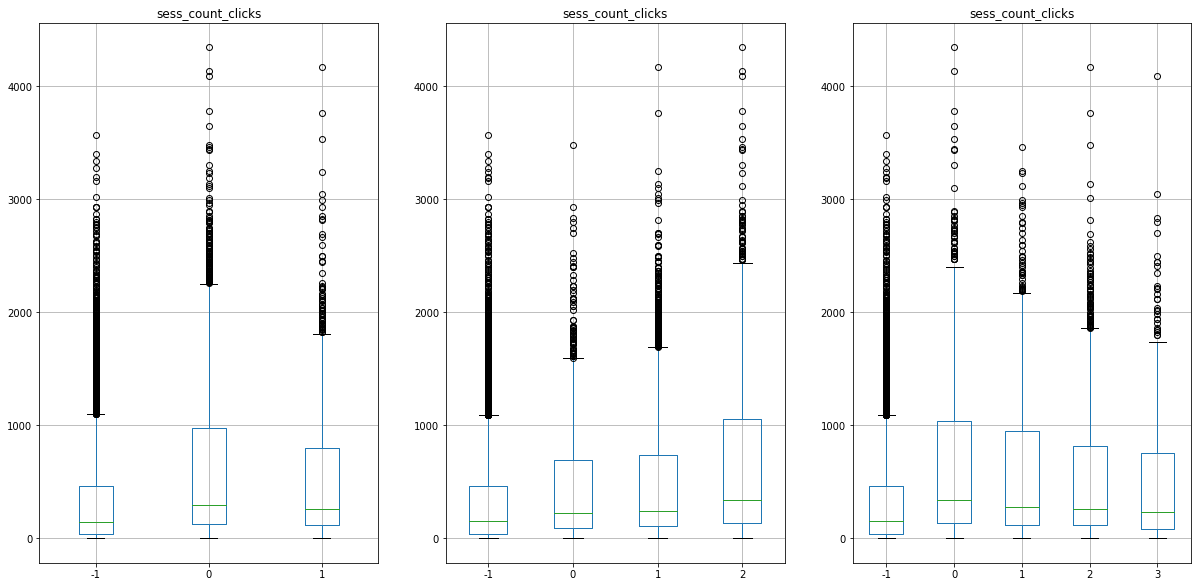

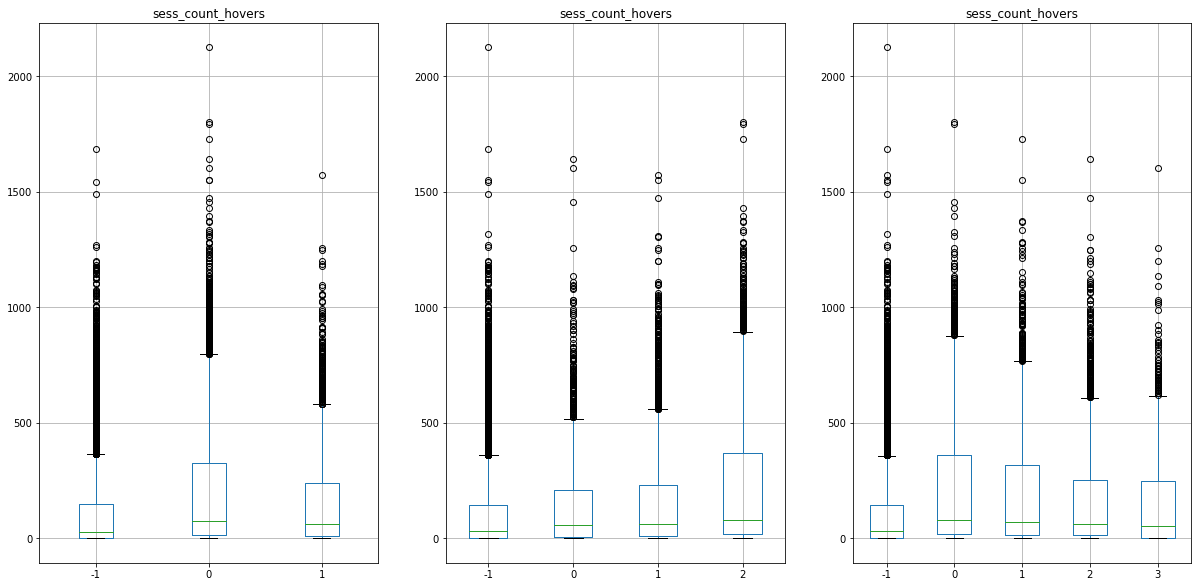

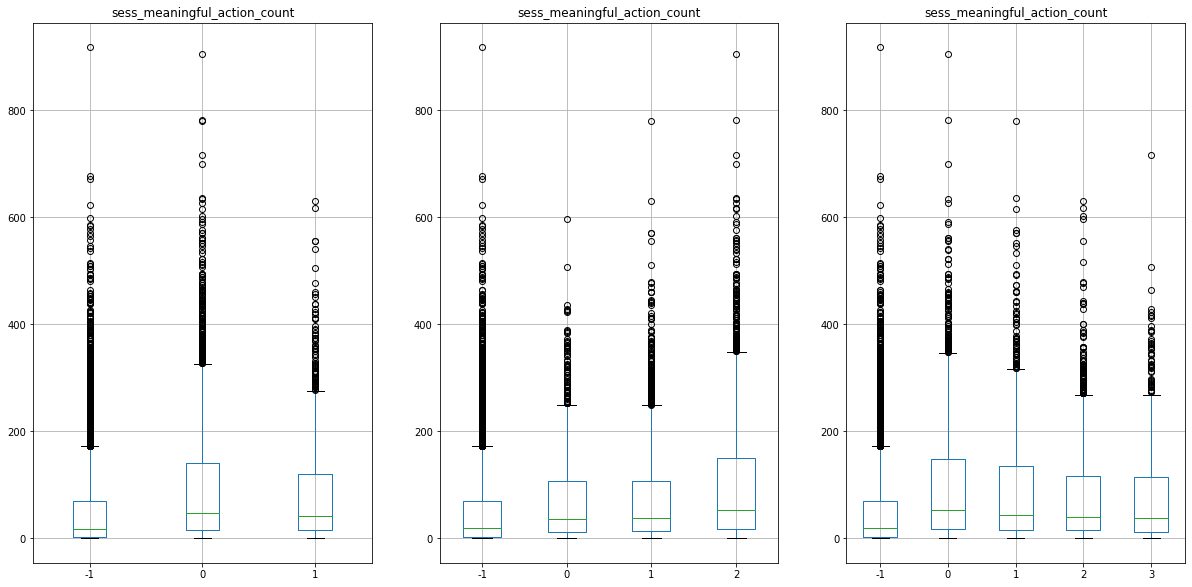

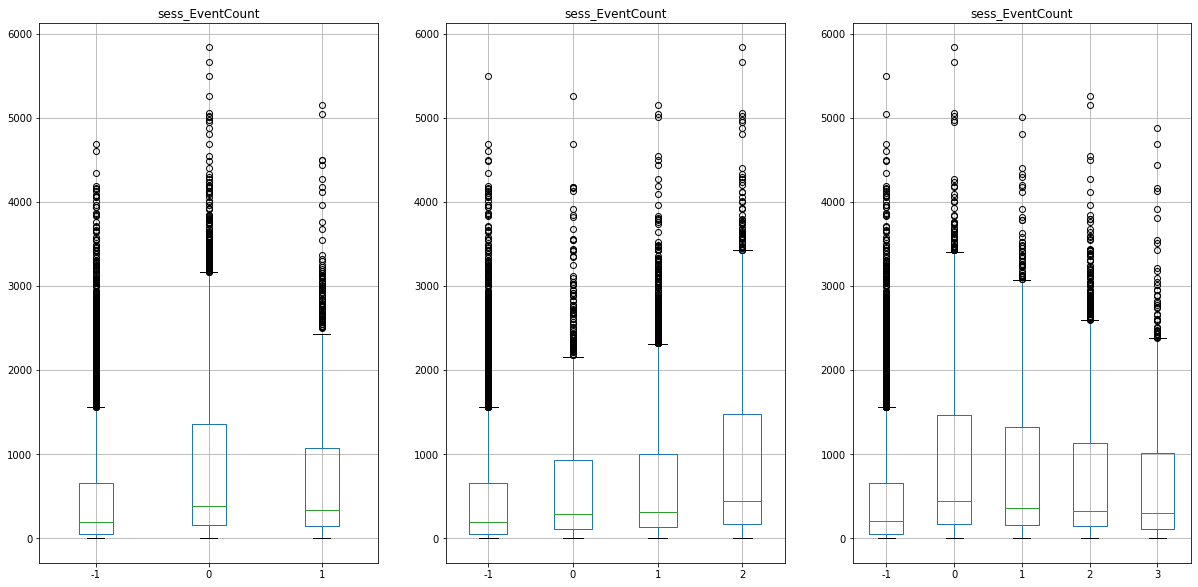

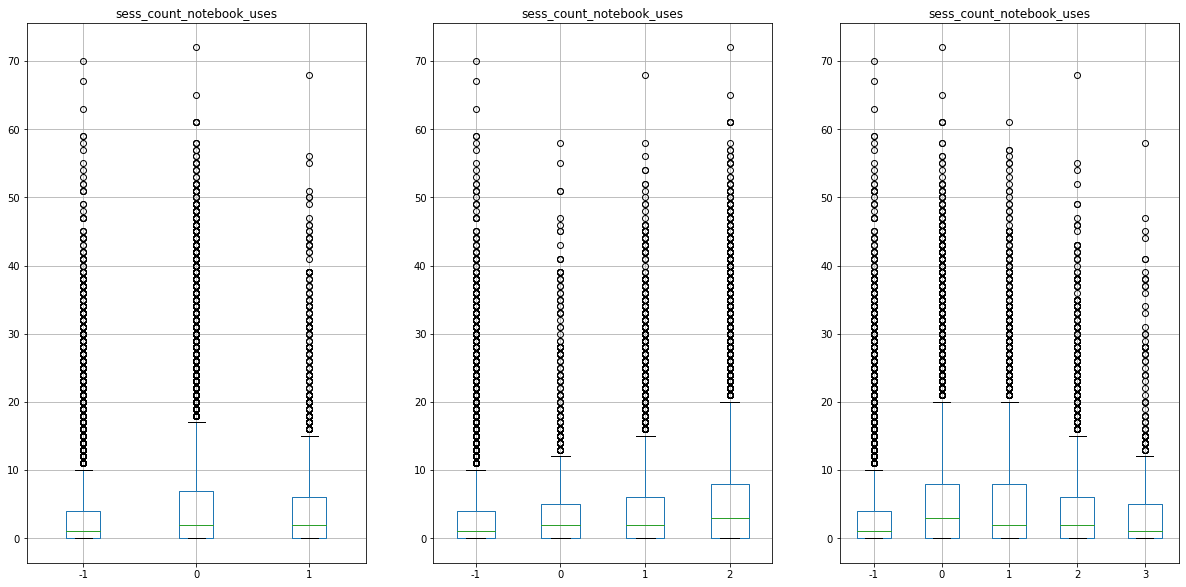

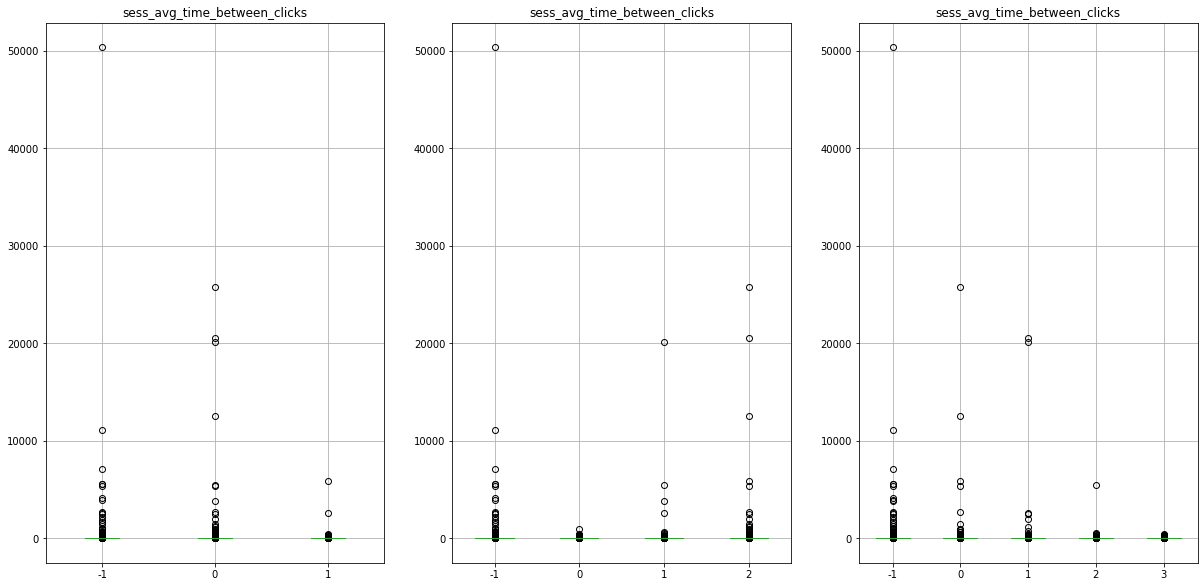

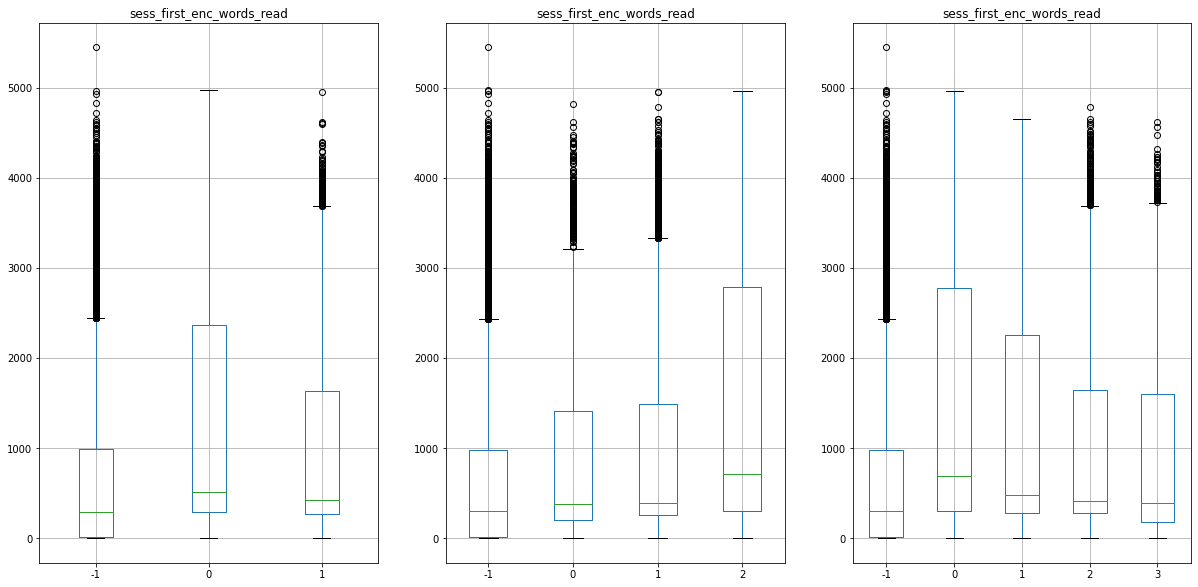

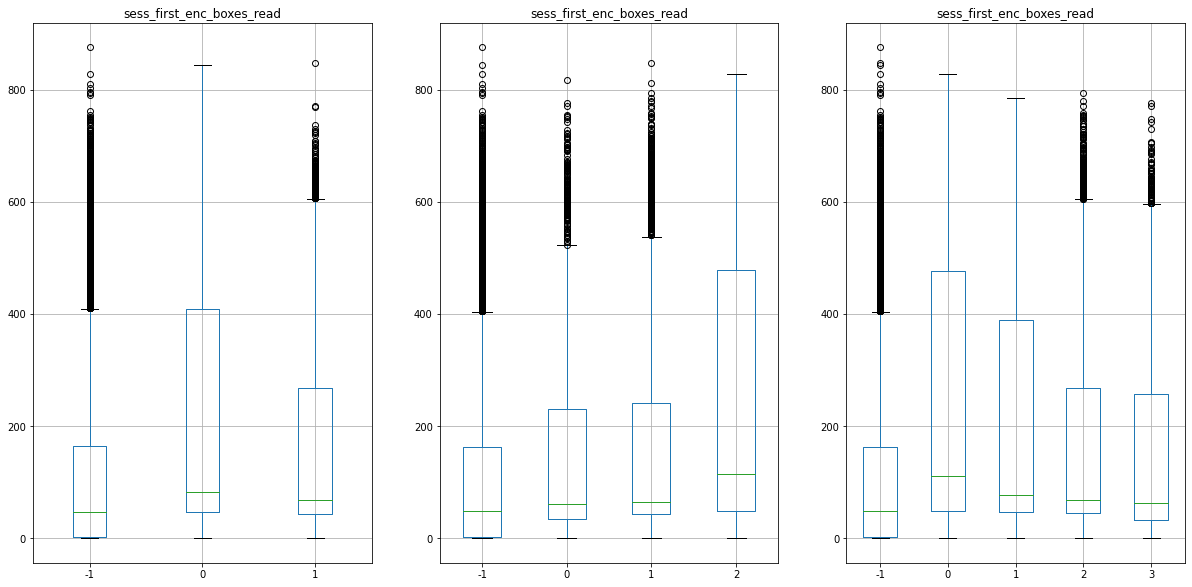

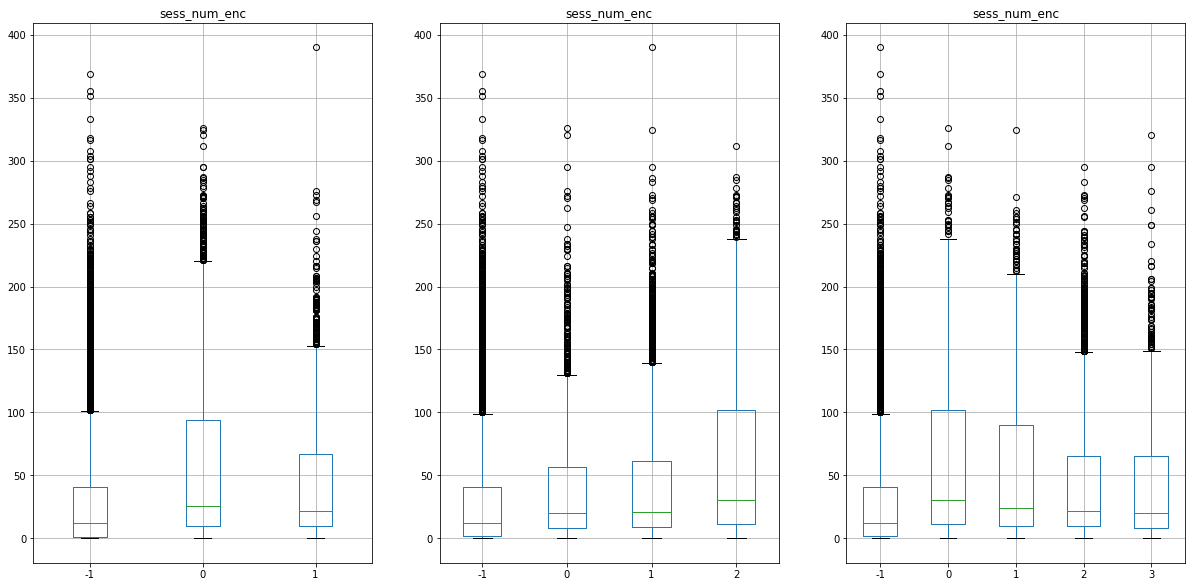

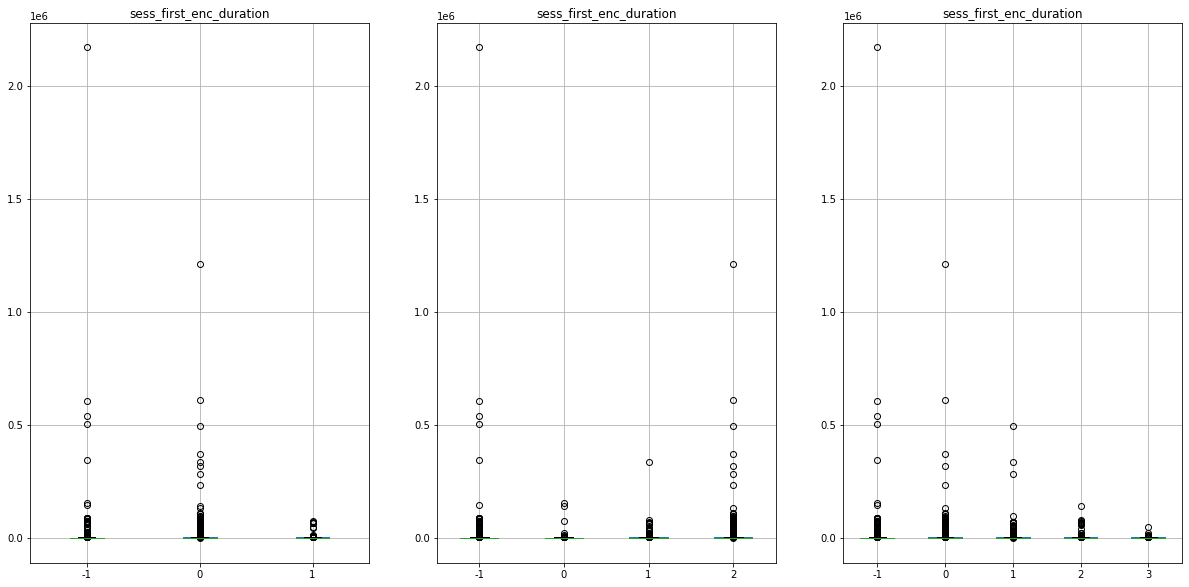

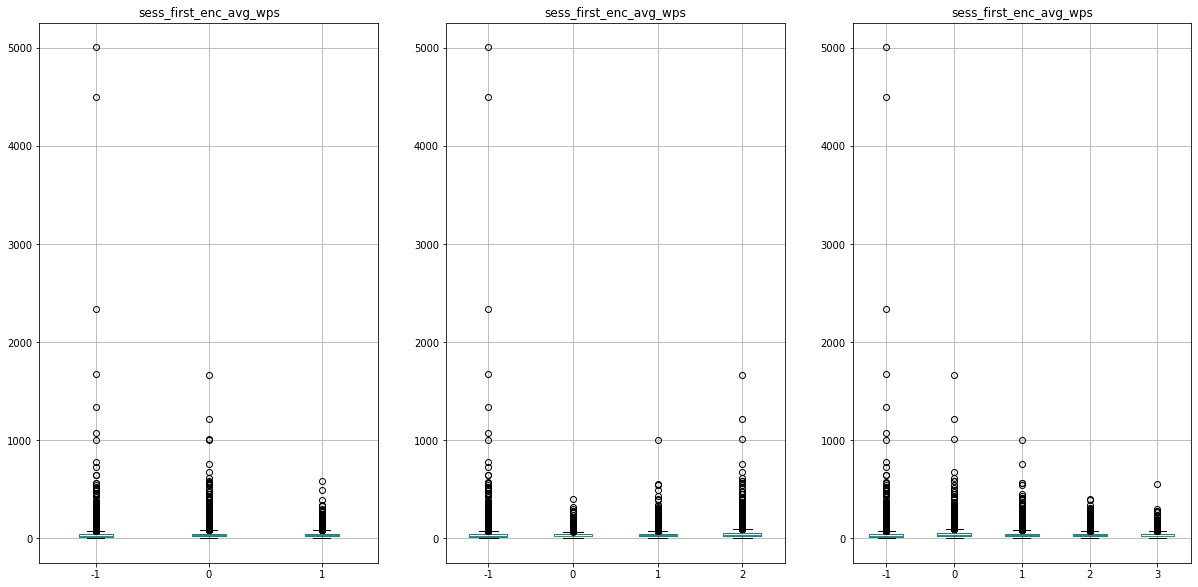

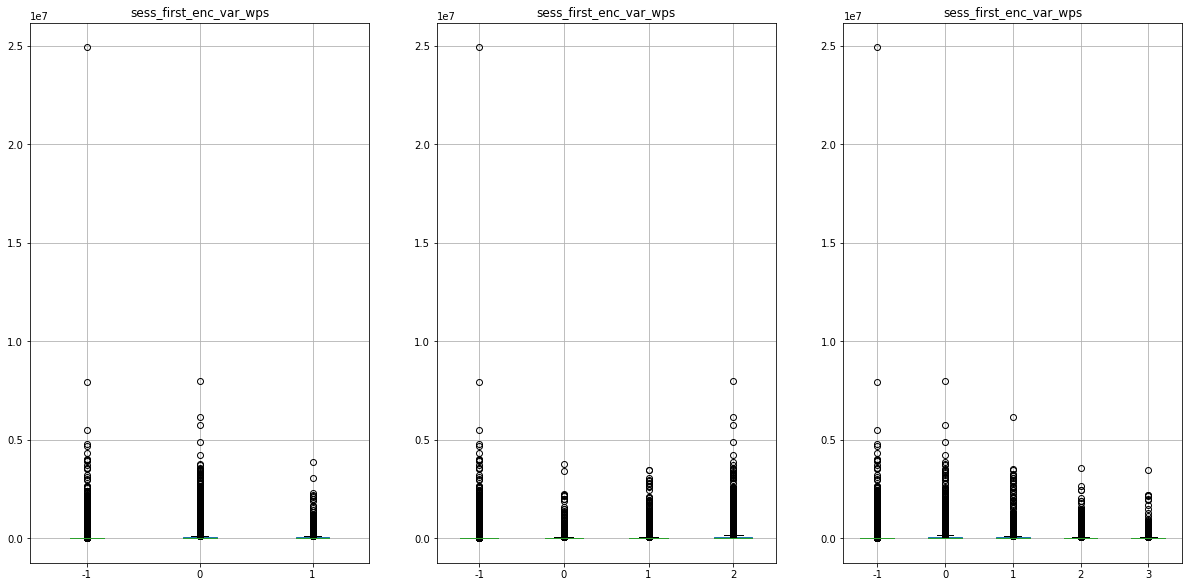

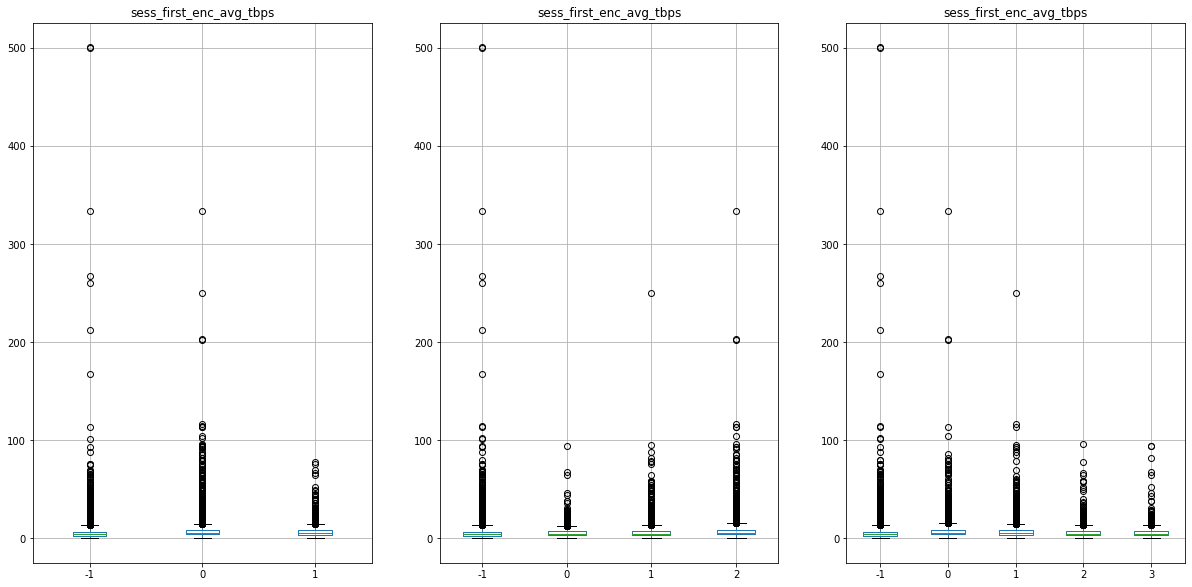

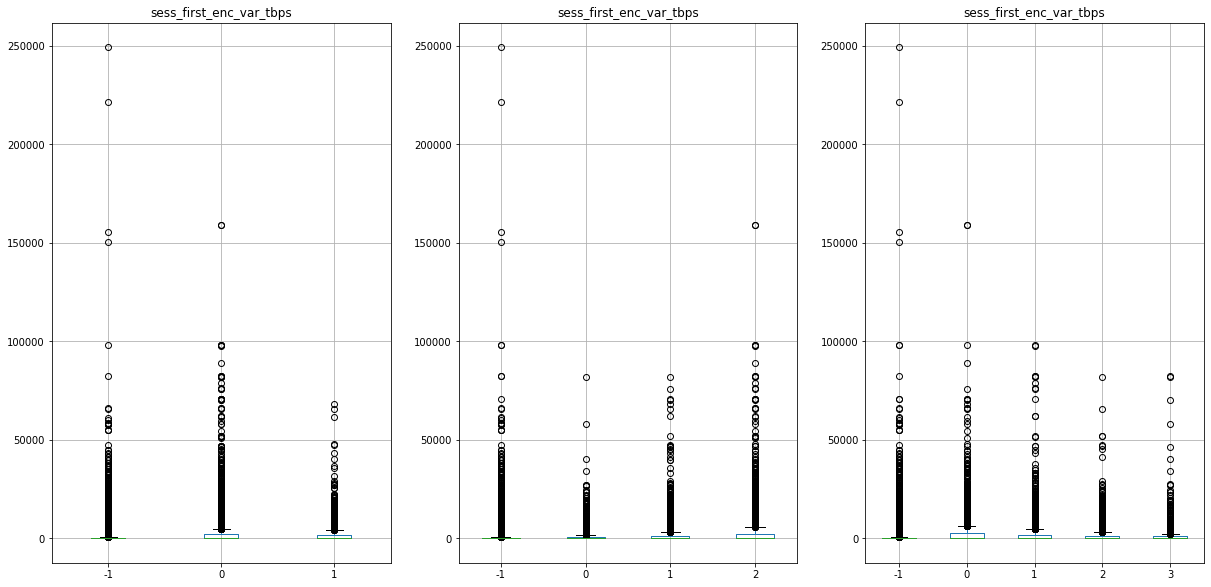

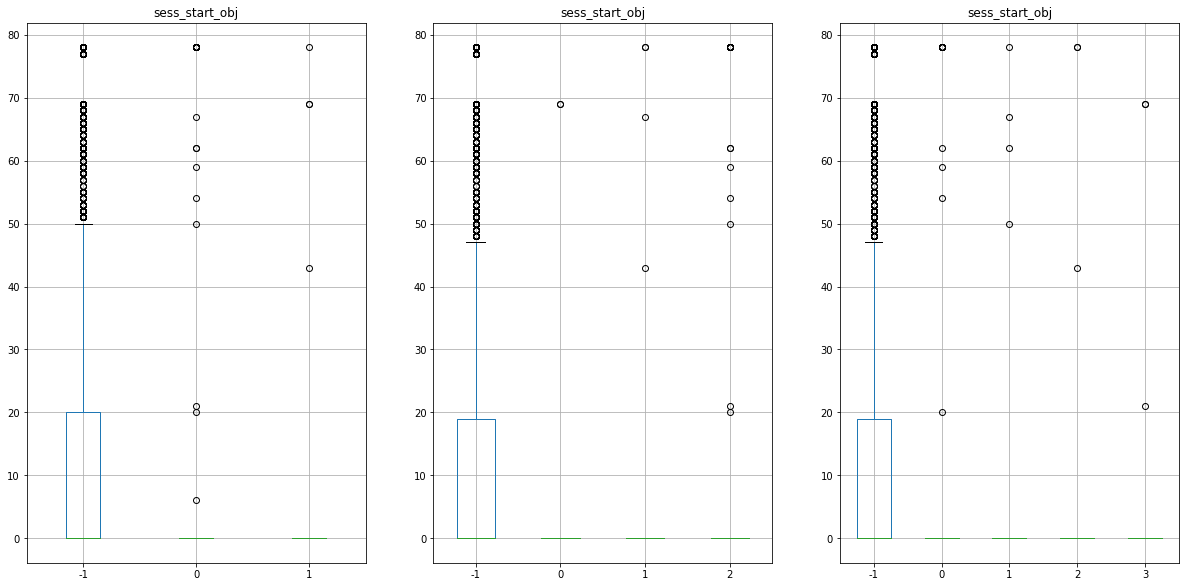

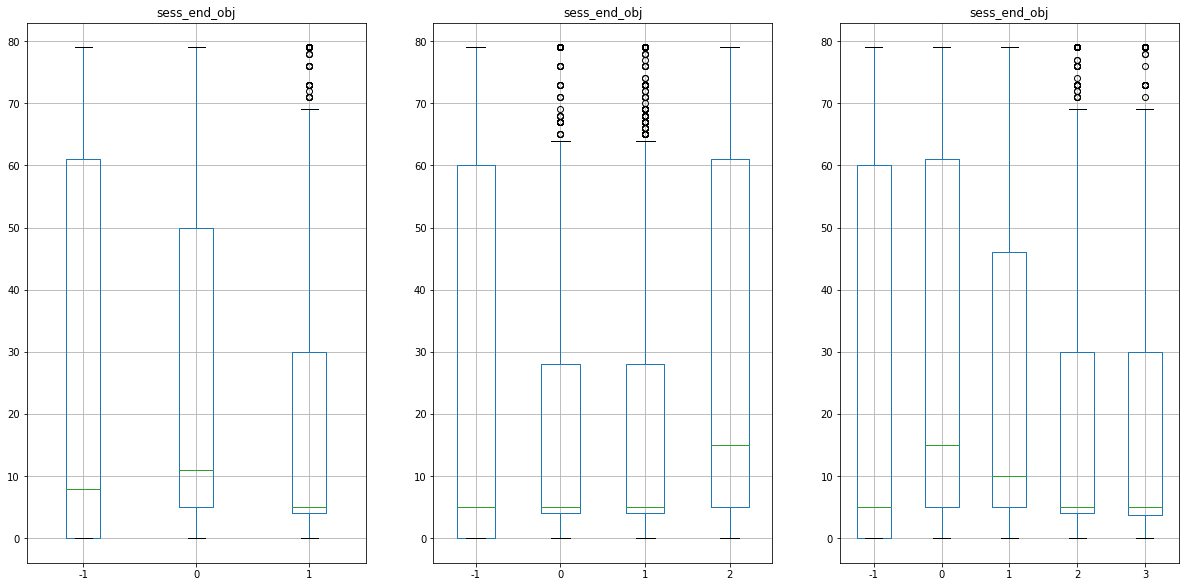

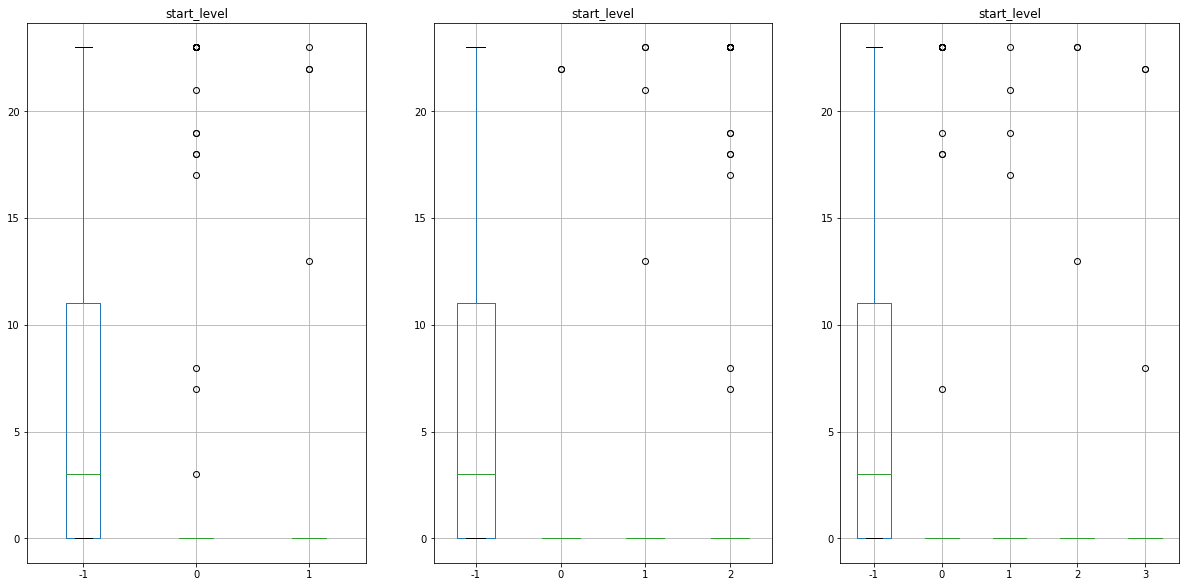

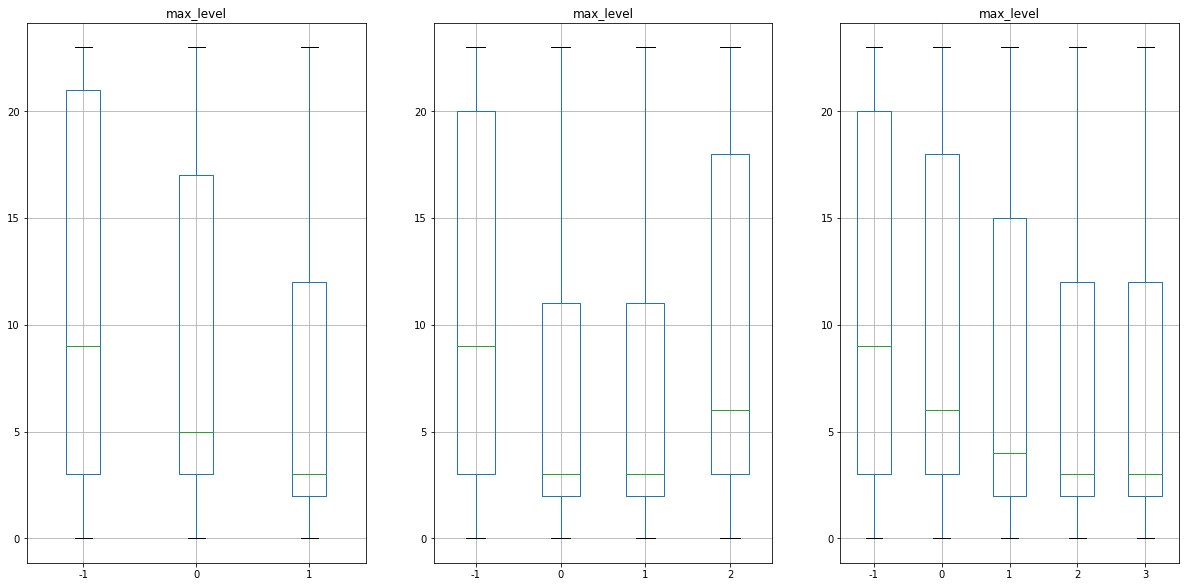

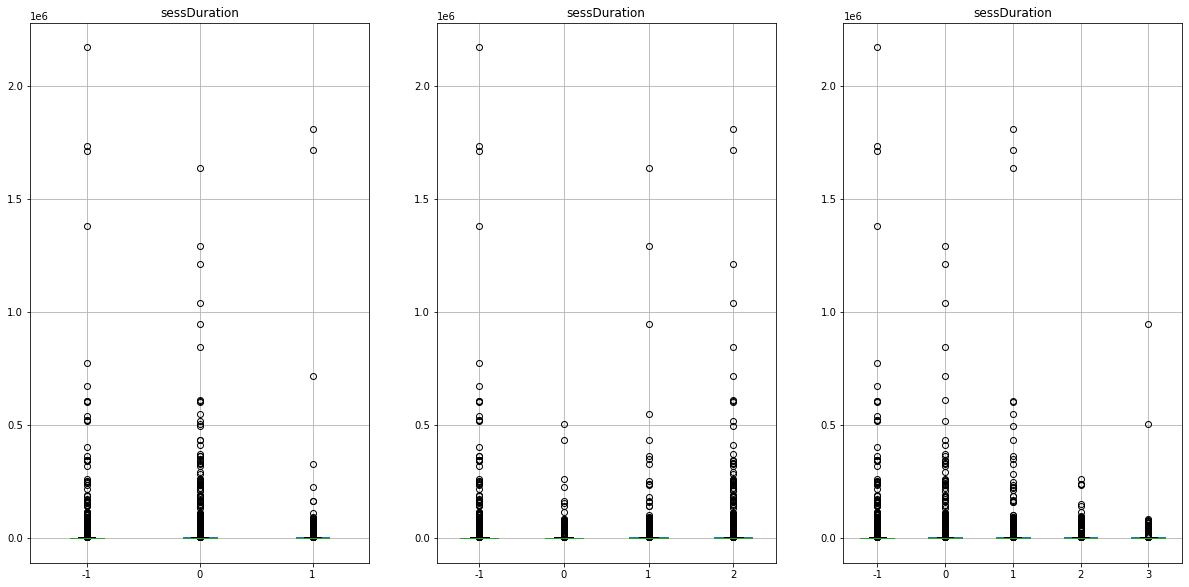

In [6]:
for cat in ['sess_count_clicks',
 'sess_count_hovers',
 'sess_meaningful_action_count',
 'sess_EventCount',
 'sess_count_notebook_uses',
 'sess_avg_time_between_clicks',
 'sess_first_enc_words_read',
 'sess_first_enc_boxes_read',
 'sess_num_enc',
 'sess_first_enc_duration',
 'sess_first_enc_avg_wps',
 'sess_first_enc_var_wps',
 'sess_first_enc_avg_tbps',
 'sess_first_enc_var_tbps',
 'sess_start_obj',
 'sess_end_obj',
 'start_level',
 'max_level',
 'sessDuration']:
    jw_util.response_boxplot(LogDF, cat, verbose=True)

In [7]:
df_func = lambda df,tdf0,tdf1,tdf2: len(tdf2)
title = 'count'
jw_util.group_by_func(LogDF, df_func, title);

df_func = lambda df,tdf0,tdf1,tdf2: round(len(tdf2)/len(df)*100,2)
title = 'percent total pop'
jw_util.group_by_func(LogDF, df_func, title);

df_func = lambda df,tdf0,tdf1,tdf2: round(len(tdf2)/len(tdf0)*100,2)
title = 'percent native class pop'
jw_util.group_by_func(LogDF, df_func, title);

df_func = lambda df,tdf0,tdf1,tdf2: (round(tdf2['sess_first_enc_avg_wps'].mean()),round(tdf2['sess_first_enc_avg_wps'].std()))
title = 'avg wps, std wps'
jw_util.group_by_func(LogDF, df_func, title);

def get_avg_std_df_func(category_name):
    def inner(df, tdf0, tdf1, tdf2):
        mean = tdf2[category_name].mean()
        std = tdf2[category_name].std()
        if not pd.isna(mean):
            mean = round(mean,2)
        if not pd.isna(std):
            std = round(std,2)
        return (mean,std)
    return inner

for category in ['sess_count_clicks',
 'sess_count_hovers',
 'sess_meaningful_action_count',
 'sess_EventCount',
 'sess_count_notebook_uses',
 'sess_avg_time_between_clicks',
 'sess_first_enc_words_read',
 'sess_first_enc_boxes_read',
 'sess_num_enc',
 'sess_first_enc_duration',
 'sess_first_enc_avg_wps',
 'sess_first_enc_var_wps',
 'sess_first_enc_avg_tbps',
 'sess_first_enc_var_tbps',
 'sess_start_obj',
 'sess_end_obj',
 'start_level',
 'max_level',
 'sessDuration']:
    df_func = get_avg_std_df_func(category)
    title = f'avg {category} std {category}'
    jw_util.group_by_func(LogDF, df_func, title)

------  count  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,236,161,214,223
okay skill,758,1157,1111,152
very good skill,6638,2115,828,160



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,37,33,73,205
okay skill,123,174,213,47
very good skill,625,217,110,52


------  percent total pop  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,0.83,0.56,0.75,0.78
okay skill,2.66,4.06,3.9,0.53
very good skill,23.27,7.42,2.9,0.56



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,0.13,0.12,0.26,0.72
okay skill,0.43,0.61,0.75,0.16
very good skill,2.19,0.76,0.39,0.18


------  percent native class pop  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,1.63,1.11,1.48,1.54
okay skill,5.24,8,7.69,1.05
very good skill,45.92,14.63,5.73,1.11



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,1.8,1.61,3.56,9.99
okay skill,5.99,8.48,10.38,2.29
very good skill,30.46,10.58,5.36,2.53


------  avg wps, std wps  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(36, 40)","(35, 30)","(41, 40)","(39, 44)"
okay skill,"(41, 37)","(40, 50)","(36, 32)","(43, 56)"
very good skill,"(44, 49)","(45, 48)","(40, 36)","(33, 22)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(37, 39)","(28, 19)","(33, 21)","(33, 32)"
okay skill,"(41, 54)","(41, 40)","(41, 48)","(24, 18)"
very good skill,"(43, 42)","(45, 37)","(39, 32)","(33, 19)"


------  avg sess_count_clicks std sess_count_clicks  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(455.78, 573.83)","(419.02, 495.16)","(570.21, 635.85)","(464.02, 569.4)"
okay skill,"(560.37, 575.1)","(485.11, 543.46)","(481.71, 548.29)","(457.52, 525.97)"
very good skill,"(586.76, 564.47)","(583.27, 579.67)","(543.98, 559.35)","(584.41, 618.45)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(420.49, 450.77)","(453.27, 634.06)","(464.16, 466.37)","(496.21, 557.16)"
okay skill,"(417.67, 499.68)","(530.84, 570.61)","(455.42, 598.43)","(387.23, 641.0)"
very good skill,"(595.16, 599.13)","(525.61, 537.38)","(602.57, 566.95)","(551.13, 579.68)"


------  avg sess_count_hovers std sess_count_hovers  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(155.39, 253.71)","(138.86, 207.15)","(204.13, 279.72)","(164.58, 248.16)"
okay skill,"(193.2, 245.05)","(163.05, 220.7)","(164.44, 228.4)","(158.92, 228.15)"
very good skill,"(203.36, 236.07)","(207.67, 250.7)","(189.77, 241.77)","(193.76, 243.48)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(151.84, 179.77)","(170.0, 259.21)","(140.55, 180.17)","(169.19, 229.04)"
okay skill,"(136.93, 213.62)","(161.69, 222.03)","(135.19, 214.53)","(144.64, 253.0)"
very good skill,"(190.42, 239.62)","(192.36, 236.49)","(191.97, 239.67)","(167.88, 221.44)"


------  avg sess_meaningful_action_count std sess_meaningful_action_count  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(68.75, 88.88)","(63.27, 70.82)","(85.57, 96.53)","(71.47, 90.55)"
okay skill,"(82.32, 85.66)","(72.62, 85.51)","(71.31, 80.98)","(68.93, 79.78)"
very good skill,"(87.22, 87.57)","(85.64, 89.41)","(80.81, 86.2)","(93.21, 107.84)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(62.78, 58.67)","(64.76, 83.54)","(74.82, 81.6)","(81.28, 97.3)"
okay skill,"(60.54, 72.86)","(78.82, 86.17)","(67.67, 88.07)","(59.49, 95.22)"
very good skill,"(89.78, 95.08)","(77.89, 81.34)","(90.79, 97.2)","(88.1, 84.42)"


------  avg sess_EventCount std sess_EventCount  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(638.3, 852.97)","(584.63, 718.89)","(808.93, 944.83)","(655.5, 852.47)"
okay skill,"(784.84, 829.5)","(673.97, 777.96)","(673.89, 796.0)","(642.38, 775.08)"
very good skill,"(819.29, 806.31)","(821.01, 839.02)","(763.31, 816.14)","(816.15, 868.04)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(600.14, 675.66)","(654.88, 937.49)","(623.41, 646.32)","(692.82, 810.19)"
okay skill,"(576.66, 734.38)","(720.88, 773.53)","(615.31, 815.29)","(555.83, 938.03)"
very good skill,"(813.88, 832.46)","(744.79, 792.21)","(823.08, 815.95)","(748.52, 816.16)"


------  avg sess_count_notebook_uses std sess_count_notebook_uses  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(5.36, 9.33)","(3.94, 7.13)","(6.47, 9.94)","(4.41, 8.56)"
okay skill,"(6.68, 9.34)","(5.5, 8.64)","(5.16, 8.17)","(4.0, 6.72)"
very good skill,"(6.21, 8.96)","(6.49, 9.14)","(5.46, 8.3)","(4.47, 7.3)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(4.78, 7.87)","(3.67, 5.33)","(5.3, 7.49)","(4.2, 7.19)"
okay skill,"(4.85, 7.28)","(6.74, 10.12)","(4.66, 9.22)","(3.64, 5.07)"
very good skill,"(6.58, 9.77)","(5.62, 7.84)","(5.47, 7.17)","(3.33, 6.39)"


------  avg sess_avg_time_between_clicks std sess_avg_time_between_clicks  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(2.97, 5.52)","(5.52, 29.74)","(4.97, 20.99)","(7.49, 38.11)"
okay skill,"(4.51, 26.1)","(21.14, 591.6)","(9.05, 165.07)","(4.92, 20.32)"
very good skill,"(12.04, 360.64)","(17.75, 452.81)","(3.71, 12.39)","(4.23, 20.06)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(1.93, 1.3)","(10.99, 52.06)","(5.45, 28.39)","(5.07, 23.73)"
okay skill,"(5.0, 16.17)","(17.9, 198.24)","(2.59, 3.69)","(6.53, 28.52)"
very good skill,"(12.63, 233.53)","(3.3, 8.94)","(6.44, 37.04)","(3.01, 5.83)"


------  avg sess_first_enc_words_read std sess_first_enc_words_read  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(944.84, 1270.32)","(942.57, 1167.26)","(1162.12, 1319.72)","(1036.29, 1288.21)"
okay skill,"(1270.64, 1354.39)","(1085.05, 1270.64)","(1058.37, 1267.25)","(960.23, 1153.55)"
very good skill,"(1432.68, 1400.98)","(1405.86, 1418.52)","(1234.96, 1305.0)","(1269.58, 1337.1)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(919.22, 1135.23)","(910.42, 1177.83)","(952.53, 1104.05)","(1137.83, 1335.5)"
okay skill,"(911.14, 1201.81)","(1109.55, 1243.53)","(929.25, 1185.43)","(700.36, 1091.95)"
very good skill,"(1354.87, 1395.64)","(1216.36, 1326.34)","(1371.25, 1378.11)","(1091.75, 1247.1)"


------  avg sess_first_enc_boxes_read std sess_first_enc_boxes_read  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(157.69, 213.75)","(157.43, 197.64)","(194.39, 222.4)","(173.27, 216.91)"
okay skill,"(212.84, 228.3)","(181.41, 213.66)","(177.11, 213.52)","(161.55, 195.54)"
very good skill,"(240.12, 235.77)","(235.72, 238.79)","(206.86, 220.21)","(212.65, 225.49)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(153.76, 192.61)","(153.03, 199.49)","(156.99, 184.31)","(189.95, 224.07)"
okay skill,"(152.16, 202.15)","(185.43, 209.29)","(154.87, 199.22)","(117.47, 182.5)"
very good skill,"(226.33, 234.29)","(203.65, 223.0)","(228.78, 230.47)","(182.38, 210.26)"


------  avg sess_num_enc std sess_num_enc  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(43.47, 59.98)","(41.5, 51.8)","(53.1, 62.34)","(44.58, 57.71)"
okay skill,"(52.48, 56.53)","(44.64, 52.57)","(45.74, 55.01)","(43.16, 52.74)"
very good skill,"(54.3, 52.89)","(54.19, 54.87)","(50.02, 53.6)","(53.31, 55.02)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(43.46, 53.86)","(44.67, 59.56)","(40.47, 43.02)","(46.0, 54.59)"
okay skill,"(38.63, 50.8)","(47.2, 51.61)","(39.96, 50.85)","(36.19, 55.5)"
very good skill,"(53.04, 53.78)","(48.65, 52.47)","(53.12, 52.89)","(51.08, 55.65)"


------  avg sess_first_enc_duration std sess_first_enc_duration  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(321.2, 543.2)","(266.46, 408.91)","(1488.01, 10831.06)","(363.26, 981.05)"
okay skill,"(730.93, 3527.86)","(884.59, 10201.14)","(554.68, 3359.51)","(729.54, 3989.76)"
very good skill,"(1372.38, 18723.94)","(1315.35, 13224.71)","(787.68, 4248.21)","(447.41, 869.94)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(265.96, 417.0)","(340.77, 683.96)","(267.84, 364.17)","(300.7, 460.57)"
okay skill,"(922.58, 5854.87)","(402.2, 551.56)","(583.61, 4496.97)","(213.82, 343.49)"
very good skill,"(765.92, 4245.78)","(690.11, 3211.13)","(1079.38, 6413.01)","(321.57, 486.25)"


------  avg sess_first_enc_avg_wps std sess_first_enc_avg_wps  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(35.62, 39.98)","(34.78, 30.28)","(40.86, 40.37)","(38.54, 43.75)"
okay skill,"(40.57, 37.38)","(39.73, 49.77)","(36.46, 32.49)","(43.18, 56.25)"
very good skill,"(44.11, 49.09)","(44.53, 48.13)","(40.19, 36.13)","(33.0, 21.87)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(37.07, 39.26)","(28.24, 18.86)","(33.25, 20.72)","(32.96, 31.9)"
okay skill,"(41.21, 53.85)","(40.52, 39.69)","(41.07, 47.94)","(24.17, 18.21)"
very good skill,"(43.32, 42.04)","(44.54, 37.31)","(38.91, 32.12)","(33.47, 18.97)"


------  avg sess_first_enc_var_wps std sess_first_enc_var_wps  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(85761.83, 352085.95)","(68974.14, 215537.23)","(102970.71, 270434.57)","(84606.68, 277542.51)"
okay skill,"(92358.33, 280863.44)","(79168.5, 258364.14)","(70068.09, 215665.93)","(119737.93, 377020.4)"
very good skill,"(106361.06, 298828.75)","(110960.47, 339851.88)","(85291.87, 255618.48)","(53415.8, 121490.12)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(108047.28, 356090.29)","(21875.38, 51897.11)","(47789.5, 128541.23)","(62057.76, 231686.21)"
okay skill,"(90859.35, 334597.9)","(92233.18, 248630.03)","(90449.22, 228013.29)","(18532.75, 49359.96)"
very good skill,"(101814.68, 275523.0)","(107050.72, 234041.69)","(90009.35, 228089.39)","(38285.63, 93300.71)"


------  avg sess_first_enc_avg_tbps std sess_first_enc_avg_tbps  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(5.96, 5.17)","(5.75, 4.57)","(6.79, 5.82)","(7.1, 10.0)"
okay skill,"(6.84, 5.72)","(6.89, 10.25)","(6.3, 5.58)","(7.5, 9.17)"
very good skill,"(7.49, 8.47)","(7.57, 8.15)","(6.77, 6.22)","(5.79, 3.85)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(5.72, 4.73)","(4.83, 3.31)","(6.0, 4.28)","(5.64, 4.76)"
okay skill,"(6.95, 8.91)","(7.14, 6.47)","(7.1, 8.94)","(4.38, 3.45)"
very good skill,"(7.47, 6.66)","(7.46, 5.73)","(6.64, 5.19)","(6.11, 4.24)"


------  avg sess_first_enc_var_tbps std sess_first_enc_var_tbps  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(1609.85, 3975.82)","(1424.92, 3627.22)","(2222.86, 4873.04)","(2443.94, 8320.24)"
okay skill,"(1957.31, 4340.77)","(1896.18, 5977.82)","(1740.46, 4650.78)","(2847.79, 8022.32)"
very good skill,"(2421.47, 6097.98)","(2514.91, 6765.31)","(1850.85, 4950.9)","(1406.58, 2874.51)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(1542.62, 4054.61)","(767.53, 1761.7)","(1122.53, 2515.35)","(1481.92, 3901.79)"
okay skill,"(2034.28, 7041.15)","(2414.09, 5345.52)","(2440.1, 7099.7)","(640.07, 2384.0)"
very good skill,"(2518.27, 5305.2)","(2338.32, 4585.14)","(2010.03, 3976.54)","(1568.42, 3671.11)"


------  avg sess_start_obj std sess_start_obj  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
okay skill,"(0.0, 0.0)","(0.06, 1.97)","(0.07, 2.34)","(0.0, 0.0)"
very good skill,"(0.11, 2.83)","(0.09, 2.42)","(0.09, 2.71)","(0.13, 1.66)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.67, 6.8)"
okay skill,"(0.0, 0.0)","(0.0, 0.0)","(0.2, 2.95)","(0.0, 0.0)"
very good skill,"(0.12, 3.12)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"


------  avg sess_end_obj std sess_end_obj  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(17.85, 25.14)","(18.2, 24.52)","(22.1, 26.33)","(20.32, 26.3)"
okay skill,"(25.7, 28.53)","(21.97, 26.98)","(20.82, 26.41)","(18.43, 23.74)"
very good skill,"(30.16, 30.52)","(29.42, 30.72)","(25.21, 27.89)","(25.28, 28.49)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(16.62, 22.9)","(16.7, 23.12)","(18.4, 23.56)","(23.6, 28.63)"
okay skill,"(18.12, 25.22)","(22.02, 26.23)","(18.25, 24.79)","(12.91, 20.23)"
very good skill,"(28.06, 30.07)","(24.43, 27.95)","(28.11, 29.49)","(20.4, 25.66)"


------  avg start_level std start_level  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
okay skill,"(0.0, 0.0)","(0.02, 0.62)","(0.02, 0.69)","(0.0, 0.0)"
very good skill,"(0.03, 0.85)","(0.03, 0.75)","(0.03, 0.8)","(0.05, 0.63)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.21, 2.17)"
okay skill,"(0.0, 0.0)","(0.0, 0.0)","(0.06, 0.89)","(0.0, 0.0)"
very good skill,"(0.04, 0.92)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"


------  avg max_level std max_level  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(6.21, 7.33)","(6.37, 7.13)","(7.55, 7.68)","(6.87, 7.67)"
okay skill,"(8.6, 8.18)","(7.48, 7.79)","(7.12, 7.62)","(6.49, 7.06)"
very good skill,"(9.83, 8.67)","(9.59, 8.73)","(8.5, 8.01)","(8.42, 8.12)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(6.19, 6.81)","(5.85, 7.03)","(6.64, 6.81)","(7.86, 8.33)"
okay skill,"(6.33, 7.26)","(7.57, 7.57)","(6.43, 7.16)","(4.62, 6.21)"
very good skill,"(9.23, 8.57)","(8.28, 8.06)","(9.32, 8.36)","(7.12, 7.29)"


------  avg sessDuration std sessDuration  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(3747.38, 29062.94)","(2268.15, 9117.26)","(5204.82, 23097.5)","(5091.17, 35060.07)"
okay skill,"(4620.86, 48840.38)","(5338.64, 55044.94)","(2818.69, 14903.44)","(8339.73, 77096.59)"
very good skill,"(4686.75, 31522.69)","(4643.92, 27402.43)","(2543.56, 10557.11)","(2649.45, 8914.86)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(763.7, 926.54)","(10183.27, 41382.89)","(1782.34, 6799.1)","(2406.76, 9932.18)"
okay skill,"(1572.34, 6050.54)","(3630.48, 25264.86)","(2071.08, 8765.52)","(1439.62, 4242.97)"
very good skill,"(3602.33, 29933.85)","(18259.28, 168745.35)","(3620.65, 12531.97)","(1723.14, 5305.0)"


### Filter

In [8]:
if options and options.filter_args is not None:
    filtered_df, filter_meta = feat_util.filter_df(LogDF, **options.filter_args)
else:
    queries = ["lvl23_count_clicks > 0", "R0_quiz_response != -1", "R1_quiz_response != -1", "R2_quiz_response != -1",'sessDuration < 3600 ','sessDuration > 0 ','start_level==0']
    filtered_df, filter_meta = feat_util.filter_df(LogDF, query_list=queries, verbose=False, fillna=0)

print(*filter_meta,sep='\n')
filtered_df

*arg* filter_args = {'fillna': 0, 'one_query': False, 'query_list': ['lvl23_count_clicks > 0', 'R0_quiz_response != -1', 'R1_quiz_response != -1', 'R2_quiz_response != -1', 'sessDuration < 3600 ', 'sessDuration > 0 ', 'start_level==0'], 'verbose': False}
Query: Intial Shape, output_shape: (28520, 2917)
Query: lvl23_count_clicks > 0, output_shape: (5127, 2917)
Query: R0_quiz_response != -1, output_shape: (2759, 2917)
Query: R1_quiz_response != -1, output_shape: (2728, 2917)
Query: R2_quiz_response != -1, output_shape: (2708, 2917)
Query: sessDuration < 3600 , output_shape: (2093, 2917)
Query: sessDuration > 0 , output_shape: (2093, 2917)
Query: start_level==0, output_shape: (2073, 2917)
Filled NaN with 0


,Q0_A1,Q0_A1_time,Q0_A2,Q0_A2_time,Q0_A3,Q0_A3_time,Q0_answers,Q0_num_guesses,Q10_A1,Q10_A1_time,Q10_A2,Q10_A2_time,Q10_A3,Q10_A3_time,Q10_answers,Q10_num_guesses,Q11_A1,Q11_A1_time,Q11_A2,Q11_A2_time,Q11_A3,Q11_A3_time,Q11_answers,Q11_num_guesses,Q12_A1,Q12_A1_time,Q12_A2,Q12_A2_time,Q12_A3,Q12_A3_time,Q12_answers,Q12_num_guesses,Q13_A1,Q13_A1_time,Q13_A2,Q13_A2_time,Q13_A3,Q13_A3_time,Q13_answers,Q13_num_guesses,Q14_A1,Q14_A1_time,Q14_A2,Q14_A2_time,Q14_A3,Q14_A3_time,Q14_answers,Q14_num_guesses,Q15_A1,Q15_A1_time,...,obj79_ocount_notebook_uses,obj79_omeaningful_action_count,obj79_onext_int,obj79_onum_enc,obj79_otime_to_next_obj,obj7_ocount_clicks,obj7_ocount_notebook_uses,obj7_omeaningful_action_count,obj7_onext_int,obj7_onum_enc,obj7_otime_to_next_obj,obj8_ocount_clicks,obj8_ocount_notebook_uses,obj8_omeaningful_action_count,obj8_onext_int,obj8_onum_enc,obj8_otime_to_next_obj,obj9_ocount_clicks,obj9_ocount_notebook_uses,obj9_omeaningful_action_count,obj9_onext_int,obj9_onum_enc,obj9_otime_to_next_obj,persistentSessionID,play_day,play_hour,play_minute,play_month,play_second,play_year,save_code,sessDuration,sess_EventCount,sess_avg_time_between_clicks,sess_count_clicks,sess_count_hovers,sess_count_notebook_uses,sess_end_obj,sess_first_enc_avg_tbps,sess_first_enc_avg_wps,sess_first_enc_boxes_read,sess_first_enc_duration,sess_first_enc_var_tbps,sess_first_enc_var_wps,sess_first_enc_words_read,sess_meaningful_action_count,sess_num_enc,sess_start_obj,start_level,sessionID
sessionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20030007041426390,D,6.987,B,5.537,0,0.000,DB,2.0,F,9.600,0,0.000,0,0.000,F,1.0,F,3.750,0,0.000,0,0.000,F,1.0,O,20.933,H,14.517,0,0.0,OH,2.0,N,19.550,0,0.000,0,0.000,N,1.0,Z,19.682,0,0.000,0,0.0,Z,1.0,c,10.671,...,0.0,0.0,0.0,0.0,17.001,18.0,0.0,3.0,8.0,1.0,16.192,11.0,0.0,0.0,103.0,2.0,22.393,9.0,0.0,0.0,105.0,3.0,23.329,20030513542945236,26,11,4,4,57,2020,0,2000.298,1641,1.683121,1185,409,10,79,9.273986,64.292211,577,927.703,3521.193869,294996.886921,3435,163,105,0,0,20030007041426390
20030009183668360,B,3.782,0,0.000,0,0.000,B,1.0,F,14.483,0,0.000,0,0.000,F,1.0,F,7.898,0,0.000,0,0.000,F,1.0,H,7.582,0,0.000,0,0.0,H,1.0,O,10.884,N,20.367,0,0.000,ON,2.0,Z,14.000,0,0.000,0,0.0,Z,1.0,c,12.098,...,0.0,0.0,0.0,0.0,26.769,12.0,0.0,2.0,8.0,1.0,15.050,9.0,0.0,0.0,9.0,1.0,14.231,9.0,0.0,0.0,105.0,3.0,21.949,20020109391643308,5,13,19,4,7,2020,0,1875.655,1431,1.831210,1020,369,6,79,10.702310,63.298373,571,947.024,4160.690469,161501.513924,3409,146,101,0,0,20030009183668360
20030010120473660,B,3.664,0,0.000,0,0.000,B,1.0,E,19.539,0,0.000,0,0.000,E,1.0,F,4.347,0,0.000,0,0.000,F,1.0,H,9.794,0,0.000,0,0.0,H,1.0,O,14.158,N,9.994,0,0.000,ON,2.0,Z,11.709,0,0.000,0,0.0,Z,1.0,c,11.293,...,0.0,0.0,0.0,0.0,26.135,16.0,0.0,2.0,8.0,1.0,20.337,9.0,0.0,0.0,9.0,1.0,12.758,9.0,0.0,0.0,108.0,3.0,23.936,20030010120473660,19,3,13,4,6,2020,0,2120.409,1583,1.825507,1115,423,3,79,4.973742,30.970700,584,1035.289,91.352987,5482.290898,3486,152,106,0,0,20030010120473660
20030010191406904,B,2.883,0,0.000,0,0.000,B,1.0,?,8.502,E,12.052,0,0.000,?E,2.0,F,3.083,0,0.000,0,0.000,F,1.0,H,3.984,0,0.000,0,0.0,H,1.0,O,7.434,N,4.584,0,0.000,ON,2.0,Z,21.103,0,0.000,0,0.0,Z,1.0,c,7.766,...,0.0,0.0,0.0,0.0,18.302,9.0,0.0,2.0,8.0,1.0,16.318,9.0,0.0,0.0,9.0,1.0,11.535,9.0,0.0,0.0,108.0,3.0,13.069,20030621431590190,26,14,19,4,40,2020,0,1658.875,1358,1.692915,974,343,2,79,11.540746,74.355986,585,878.275,5556.207239,443235.661852,3485,137,105,0,0,20030010191406904
20030010215175356,D,13.029,C,2.793,B,3.308,DCB,3.0,F,22.470,H,2.345,E,4.245,FHE,3.0,H,3.963,F,3.691,0,0.000,HF,2.0,H,4.946,0,0.000,0,0.0,H,1.0,N,19.462,0,0.000,0,0.000,N,1.0,Z,13.658,0,0.000,0,0.0,Z,1.0,e,9.061,...,0.0,0.0,0.0,0.0,31.804,21.0,0.0,5.0,8.0,1.0,18.763,13.0,0.0,0.0,103.0,3.0,32.031,9.0,0.0,0.0,108.0,3.0,18.834,20030010210137310,5,14,22,4,39,2020,0,2780.227,2582,1.596306,1734,776,4,79,6.876895,43.410990,621,1192.739,526.742213,31337.292


sessDuration
EFL_yes_no
R0_quiz_response # chose 0: 1857 (90%). Avg 2280.00989606893, std 613.1569874173155.
R0_quiz_response # chose 1: 216 (10%). Avg 2309.152421296296, std 642.7663857253875.
skill_low_med_high
R1_quiz_response # chose 0: 88 (4%). Avg 2223.0620795454556, std 684.3101819350675.
R1_quiz_response # chose 1: 325 (16%). Avg 2391.3921876923087, std 670.201373725215.
R1_quiz_response # chose 2: 1660 (80%). Avg 2265.014081927711, std 599.2927591261749.
enjoy_high_med_low_none
R2_quiz_response # chose 0: 1271 (61%). Avg 2264.0274020456336, std 607.3319135653841.
R2_quiz_response # chose 1: 492 (24%). Avg 2307.079333333333, std 614.0916521492003.
R2_quiz_response # chose 2: 239 (12%). Avg 2343.0977907949773, std 662.4707512755585.
R2_quiz_response # chose 3: 71 (3%). Avg 2254.831943661971, std 621.7558866611763.

max_level
EFL_yes_no
R0_quiz_response # chose 0: 1857 (90%). Avg 23.0, std 0.0.
R0_quiz_response # chose 1: 216 (10%). Avg 23.0, std 0.0.
skill_low_med_high
R1_quiz_

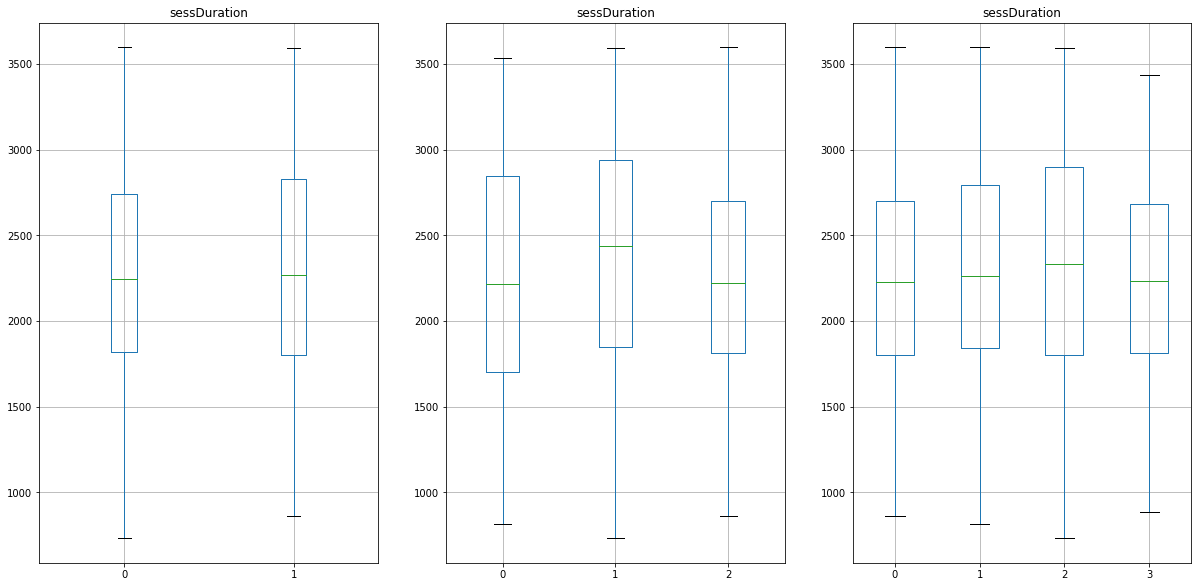

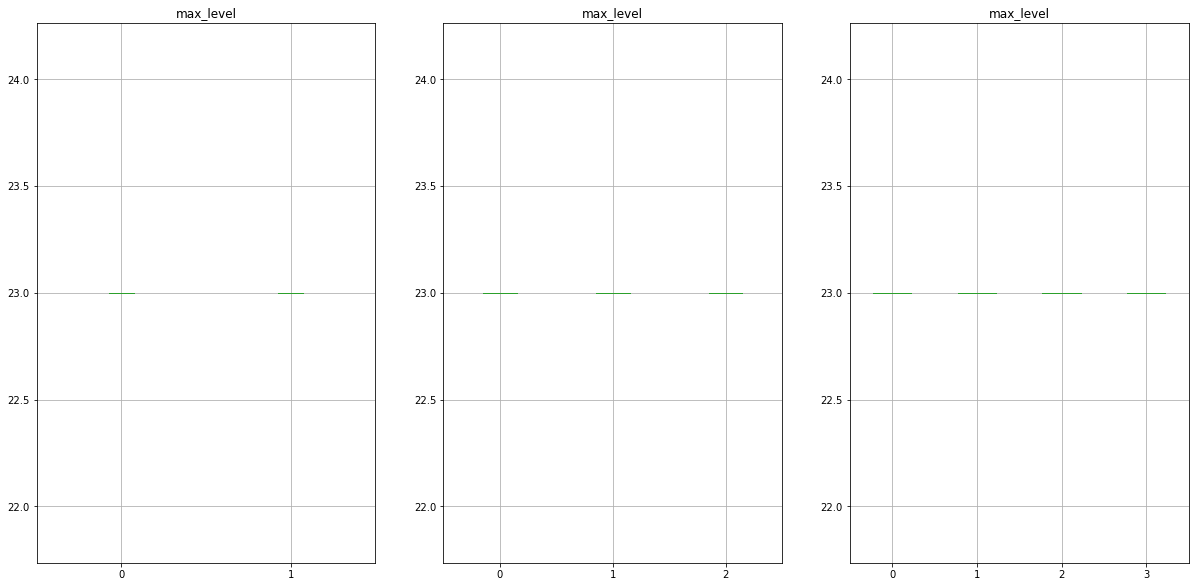

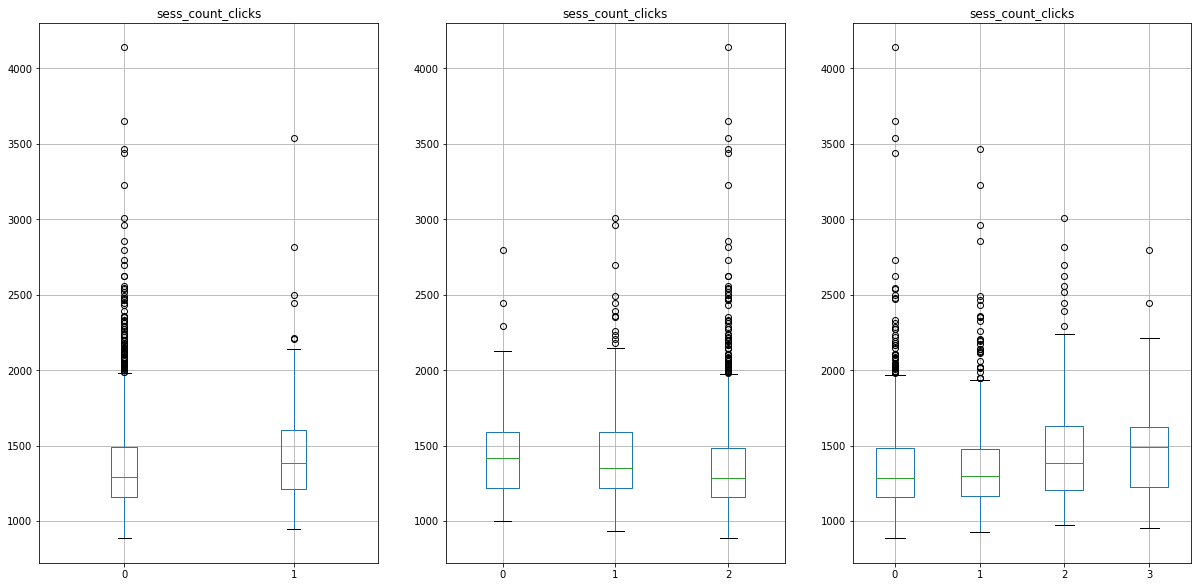

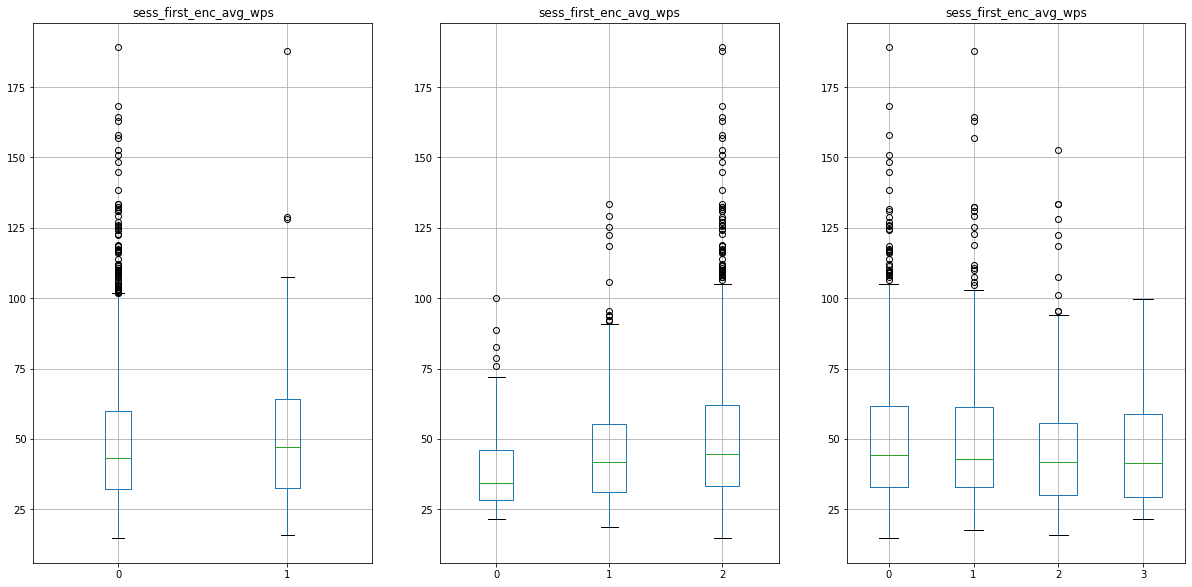

In [9]:
category = 'sessDuration'
df = filtered_df

for cat in ['sessDuration', 'max_level', 'sess_count_clicks','sess_first_enc_avg_wps']:
    jw_util.response_boxplot(filtered_df, cat, verbose=True)

Only Full Session Students

sessDuration
EFL_yes_no
R0_quiz_response # chose 0: 1857 (90%). Avg 2280.00989606893, std 613.1569874173155.
R0_quiz_response # chose 1: 216 (10%). Avg 2309.152421296296, std 642.7663857253875.
skill_low_med_high
R1_quiz_response # chose 0: 88 (4%). Avg 2223.0620795454556, std 684.3101819350675.
R1_quiz_response # chose 1: 325 (16%). Avg 2391.3921876923087, std 670.201373725215.
R1_quiz_response # chose 2: 1660 (80%). Avg 2265.014081927711, std 599.2927591261749.
enjoy_high_med_low_none
R2_quiz_response # chose 0: 1271 (61%). Avg 2264.0274020456336, std 607.3319135653841.
R2_quiz_response # chose 1: 492 (24%). Avg 2307.079333333333, std 614.0916521492003.
R2_quiz_response # chose 2: 239 (12%). Avg 2343.0977907949773, std 662.4707512755585.
R2_quiz_response # chose 3: 71 (3%). Avg 2254.831943661971, std 621.7558866611763.

max_level
EFL_yes_no
R0_quiz_response # chose 0: 1857 (90%). Avg 23.0, std 0.0.
R0_quiz_response # chose 1: 216 (10%). Avg 23.0, std 0.0.


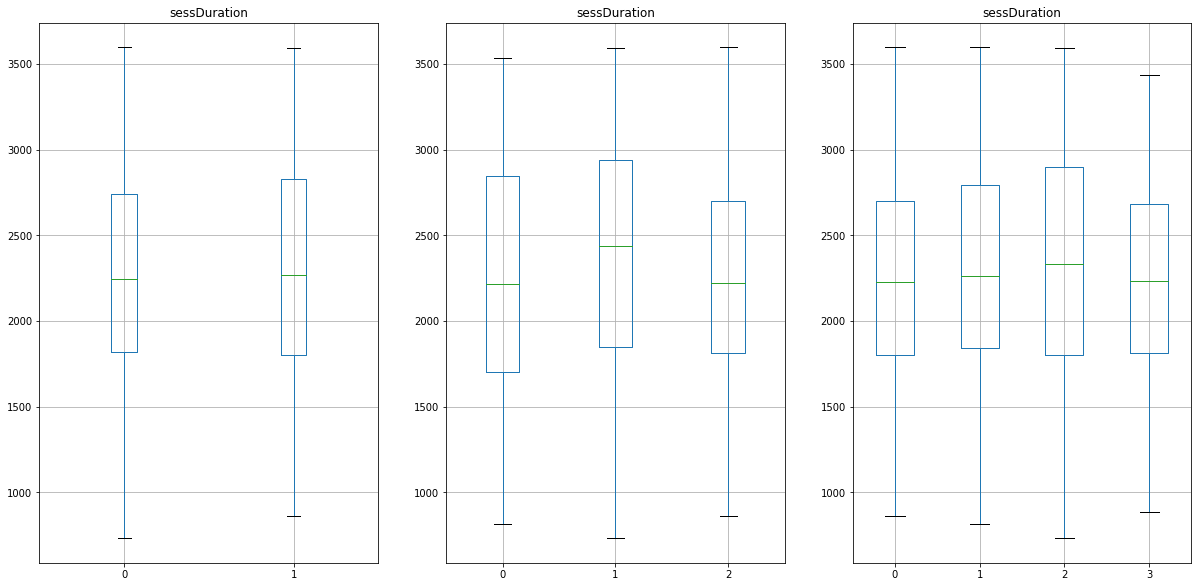

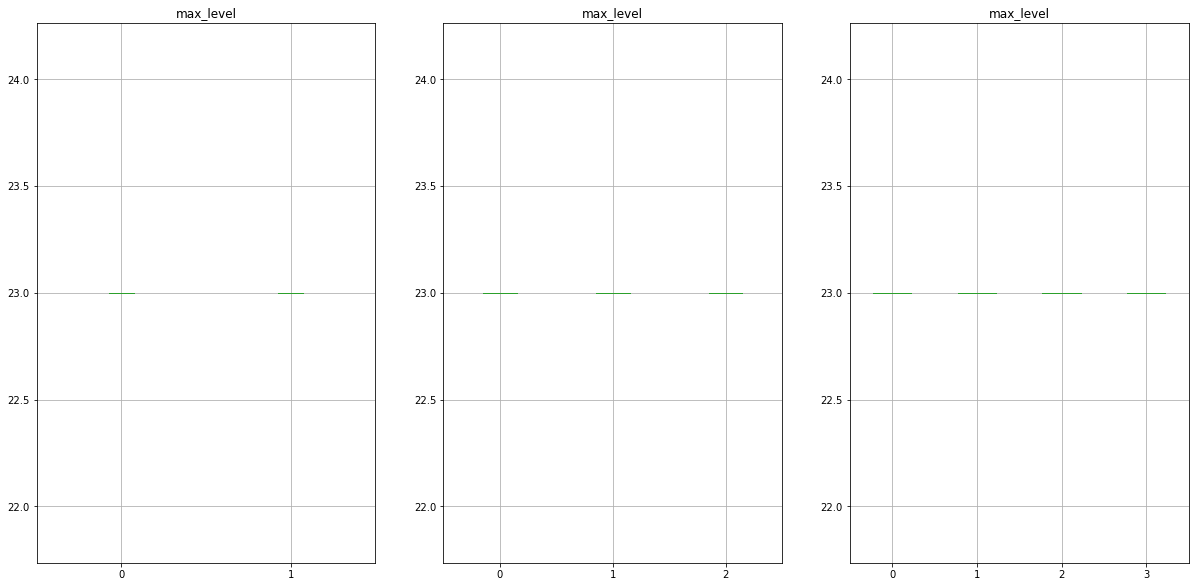

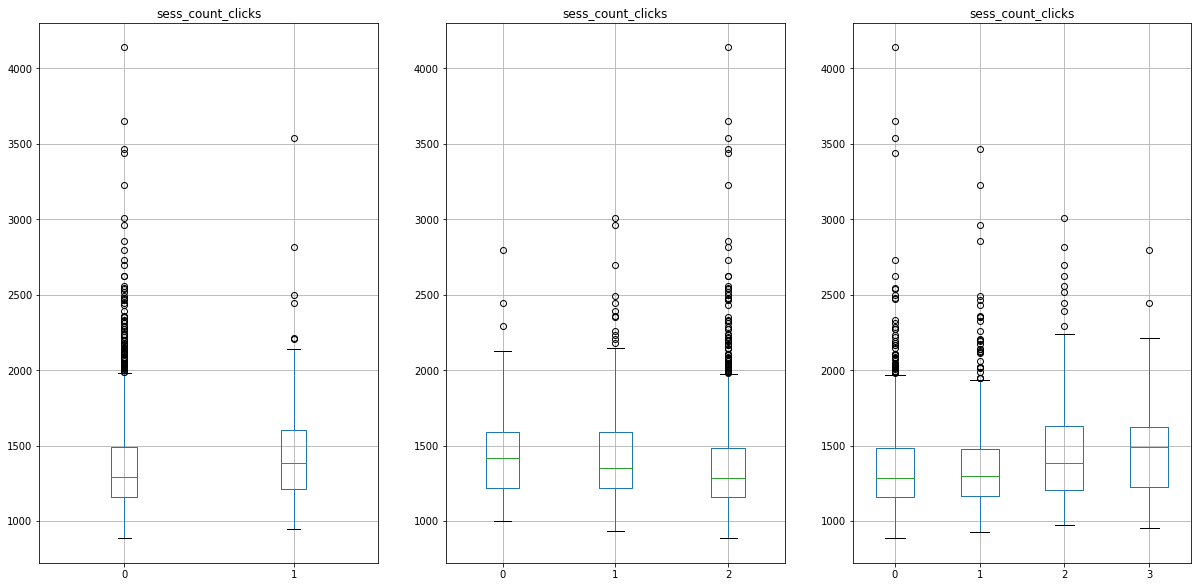

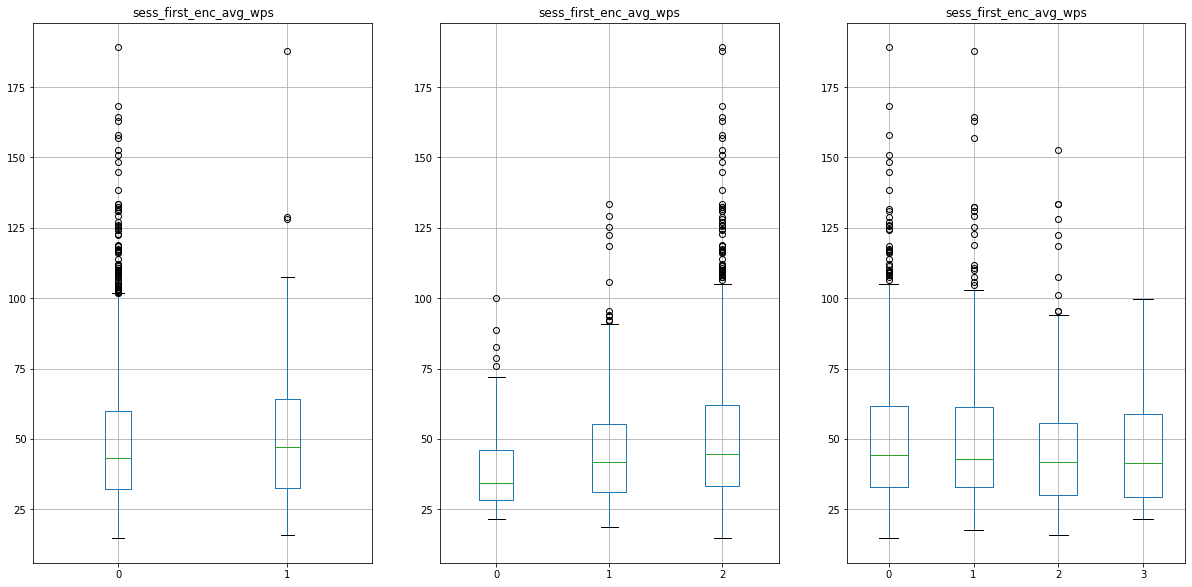

In [10]:
print('Only Full Session Students')
full_sess_df = filtered_df.query('max_level==23')
for cat in ['sessDuration', 'max_level', 'sess_count_clicks','sess_first_enc_avg_wps']:
    jw_util.response_boxplot(full_sess_df, cat, verbose=True)

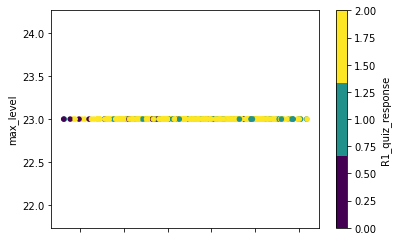

In [11]:
filtered_df.sample(n=500).plot.scatter('sessDuration','max_level',c='R1_quiz_response',colormap=plt.cm.get_cmap('viridis',3))

### Create New Features



In [12]:
if options and options.new_feat_args is not None:
    new_feat_df, new_feat_meta = feat_util.create_new_base_features(filtered_df, **options.new_feat_args)
else:
    new_feat_df, new_feat_meta = feat_util.create_new_base_features(filtered_df)
print(*new_feat_meta,sep='\n')
new_feat_df

*arg* new_feat_args = {'verbose': False}


,Q0_A1,Q0_A1_time,Q0_A2,Q0_A2_time,Q0_A3,Q0_A3_time,Q0_answers,Q0_num_guesses,Q10_A1,Q10_A1_time,Q10_A2,Q10_A2_time,Q10_A3,Q10_A3_time,Q10_answers,Q10_num_guesses,Q11_A1,Q11_A1_time,Q11_A2,Q11_A2_time,Q11_A3,Q11_A3_time,Q11_answers,Q11_num_guesses,Q12_A1,Q12_A1_time,Q12_A2,Q12_A2_time,Q12_A3,Q12_A3_time,Q12_answers,Q12_num_guesses,Q13_A1,Q13_A1_time,Q13_A2,Q13_A2_time,Q13_A3,Q13_A3_time,Q13_answers,Q13_num_guesses,Q14_A1,Q14_A1_time,Q14_A2,Q14_A2_time,Q14_A3,Q14_A3_time,Q14_answers,Q14_num_guesses,Q15_A1,Q15_A1_time,...,obj79_ocount_notebook_uses,obj79_omeaningful_action_count,obj79_onext_int,obj79_onum_enc,obj79_otime_to_next_obj,obj7_ocount_clicks,obj7_ocount_notebook_uses,obj7_omeaningful_action_count,obj7_onext_int,obj7_onum_enc,obj7_otime_to_next_obj,obj8_ocount_clicks,obj8_ocount_notebook_uses,obj8_omeaningful_action_count,obj8_onext_int,obj8_onum_enc,obj8_otime_to_next_obj,obj9_ocount_clicks,obj9_ocount_notebook_uses,obj9_omeaningful_action_count,obj9_onext_int,obj9_onum_enc,obj9_otime_to_next_obj,persistentSessionID,play_day,play_hour,play_minute,play_month,play_second,play_year,save_code,sessDuration,sess_EventCount,sess_avg_time_between_clicks,sess_count_clicks,sess_count_hovers,sess_count_notebook_uses,sess_end_obj,sess_first_enc_avg_tbps,sess_first_enc_avg_wps,sess_first_enc_boxes_read,sess_first_enc_duration,sess_first_enc_var_tbps,sess_first_enc_var_wps,sess_first_enc_words_read,sess_meaningful_action_count,sess_num_enc,sess_start_obj,start_level,sessionID
sessionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20030007041426390,D,6.987,B,5.537,0,0.000,DB,2.0,F,9.600,0,0.000,0,0.000,F,1.0,F,3.750,0,0.000,0,0.000,F,1.0,O,20.933,H,14.517,0,0.0,OH,2.0,N,19.550,0,0.000,0,0.000,N,1.0,Z,19.682,0,0.000,0,0.0,Z,1.0,c,10.671,...,0.0,0.0,0.0,0.0,17.001,18.0,0.0,3.0,8.0,1.0,16.192,11.0,0.0,0.0,103.0,2.0,22.393,9.0,0.0,0.0,105.0,3.0,23.329,20030513542945236,26,11,4,4,57,2020,0,2000.298,1641,1.683121,1185,409,10,79,9.273986,64.292211,577,927.703,3521.193869,294996.886921,3435,163,105,0,0,20030007041426390
20030009183668360,B,3.782,0,0.000,0,0.000,B,1.0,F,14.483,0,0.000,0,0.000,F,1.0,F,7.898,0,0.000,0,0.000,F,1.0,H,7.582,0,0.000,0,0.0,H,1.0,O,10.884,N,20.367,0,0.000,ON,2.0,Z,14.000,0,0.000,0,0.0,Z,1.0,c,12.098,...,0.0,0.0,0.0,0.0,26.769,12.0,0.0,2.0,8.0,1.0,15.050,9.0,0.0,0.0,9.0,1.0,14.231,9.0,0.0,0.0,105.0,3.0,21.949,20020109391643308,5,13,19,4,7,2020,0,1875.655,1431,1.831210,1020,369,6,79,10.702310,63.298373,571,947.024,4160.690469,161501.513924,3409,146,101,0,0,20030009183668360
20030010120473660,B,3.664,0,0.000,0,0.000,B,1.0,E,19.539,0,0.000,0,0.000,E,1.0,F,4.347,0,0.000,0,0.000,F,1.0,H,9.794,0,0.000,0,0.0,H,1.0,O,14.158,N,9.994,0,0.000,ON,2.0,Z,11.709,0,0.000,0,0.0,Z,1.0,c,11.293,...,0.0,0.0,0.0,0.0,26.135,16.0,0.0,2.0,8.0,1.0,20.337,9.0,0.0,0.0,9.0,1.0,12.758,9.0,0.0,0.0,108.0,3.0,23.936,20030010120473660,19,3,13,4,6,2020,0,2120.409,1583,1.825507,1115,423,3,79,4.973742,30.970700,584,1035.289,91.352987,5482.290898,3486,152,106,0,0,20030010120473660
20030010191406904,B,2.883,0,0.000,0,0.000,B,1.0,?,8.502,E,12.052,0,0.000,?E,2.0,F,3.083,0,0.000,0,0.000,F,1.0,H,3.984,0,0.000,0,0.0,H,1.0,O,7.434,N,4.584,0,0.000,ON,2.0,Z,21.103,0,0.000,0,0.0,Z,1.0,c,7.766,...,0.0,0.0,0.0,0.0,18.302,9.0,0.0,2.0,8.0,1.0,16.318,9.0,0.0,0.0,9.0,1.0,11.535,9.0,0.0,0.0,108.0,3.0,13.069,20030621431590190,26,14,19,4,40,2020,0,1658.875,1358,1.692915,974,343,2,79,11.540746,74.355986,585,878.275,5556.207239,443235.661852,3485,137,105,0,0,20030010191406904
20030010215175356,D,13.029,C,2.793,B,3.308,DCB,3.0,F,22.470,H,2.345,E,4.245,FHE,3.0,H,3.963,F,3.691,0,0.000,HF,2.0,H,4.946,0,0.000,0,0.0,H,1.0,N,19.462,0,0.000,0,0.000,N,1.0,Z,13.658,0,0.000,0,0.0,Z,1.0,e,9.061,...,0.0,0.0,0.0,0.0,31.804,21.0,0.0,5.0,8.0,1.0,18.763,13.0,0.0,0.0,103.0,3.0,32.031,9.0,0.0,0.0,108.0,3.0,18.834,20030010210137310,5,14,22,4,39,2020,0,2780.227,2582,1.596306,1734,776,4,79,6.876895,43.410990,621,1192.739,526.742213,31337.292

# Detect optimal features

In [13]:
numeric_df = new_feat_df.select_dtypes(include='number')
print(f"Ignoring non-numeric features, reduces from {len(new_feat_df.columns)} to {len(numeric_df.columns)} features.")
feat_detect_data = numeric_df.drop(['R0_quiz_response', 'R1_quiz_response', 'R2_quiz_response'], axis=1)
# print(f"number of starting columns: {len(feat_detect_data.columns)}")
# drops = [elem for elem in feat_detect_data.columns if elem.startswith("int")]
# drops += [elem for elem in feat_detect_data.columns if elem.startswith("lvl")]
# drops += [elem for elem in feat_detect_data.columns if elem.startswith("obj")]
# drops += [elem for elem in feat_detect_data.columns if elem.startswith("Q")]
# print(f"dropping: {drops}")
# feat_detect_data = feat_detect_data.drop(drops, axis=1)
# print(f"number of remaining columns: {len(feat_detect_data.columns)}")
# print(f"remaining columns: {feat_detect_data.columns}")
predict_R0 = new_feat_df.loc[:, 'R0_quiz_response']
predict_R1 = new_feat_df.loc[:, 'R1_quiz_response']
predict_R2 = new_feat_df.loc[:, 'R2_quiz_response']

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

pre_test_model_R0 = Lasso(alpha=1, max_iter=2000)
pre_test_model_R1 = Lasso(alpha=1, max_iter=2000)
pre_test_model_R2 = Lasso(alpha=1, max_iter=2000)
pre_test_results_R0 = pre_test_model_R0.fit(feat_detect_data, predict_R0)
pre_test_results_R1 = pre_test_model_R1.fit(feat_detect_data, predict_R1)
pre_test_results_R2 = pre_test_model_R2.fit(feat_detect_data, predict_R2)

selector_R0 = SelectFromModel(Lasso(alpha=1, max_iter=2000)).fit(feat_detect_data, predict_R0)
selector_R1 = SelectFromModel(Lasso(alpha=1, max_iter=2000)).fit(feat_detect_data, predict_R1)
selector_R2 = SelectFromModel(Lasso(alpha=1, max_iter=2000)).fit(feat_detect_data, predict_R2)

Ignoring non-numeric features, reduces from 2917 to 2840 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.25642391102362, tolerance: 0.019349348769898723
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.66582407289, tolerance: 0.05559189580318389
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540.037292476848, tolerance: 0.14118967679691272
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.25642

In [0]:
CHART_SIZE_FACTOR = 10 #@param {type:"integer"}
def FeatureSuggestionPlot(features, importances, title):
  fig = plt.figure(figsize=[6.4, len(importances)*(CHART_SIZE_FACTOR/10)/4])
  ax = fig.subplots()
  y_pos = np.arange(len(features))
  ax.barh(y_pos, importances, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(features)
  ax.set_xlabel("Importance")
  ax.set_title(title)
  fig.show()

greatest importance R0: 0.00010824864286012754
greatest importance R1: 0.00048790884697252223
greatest importance R2: 0.0009302643065483582
Number of features for predicting R0_quiz_response: 43
Number of features for predicting R1_quiz_response: 83
Number of features for predicting R2_quiz_response: 159
Number of common features: 16
Greatest average importance for common features: 0.0001333561216968472


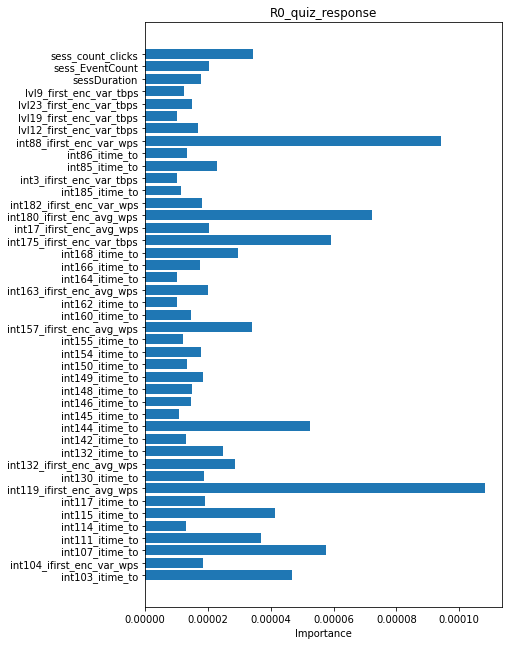

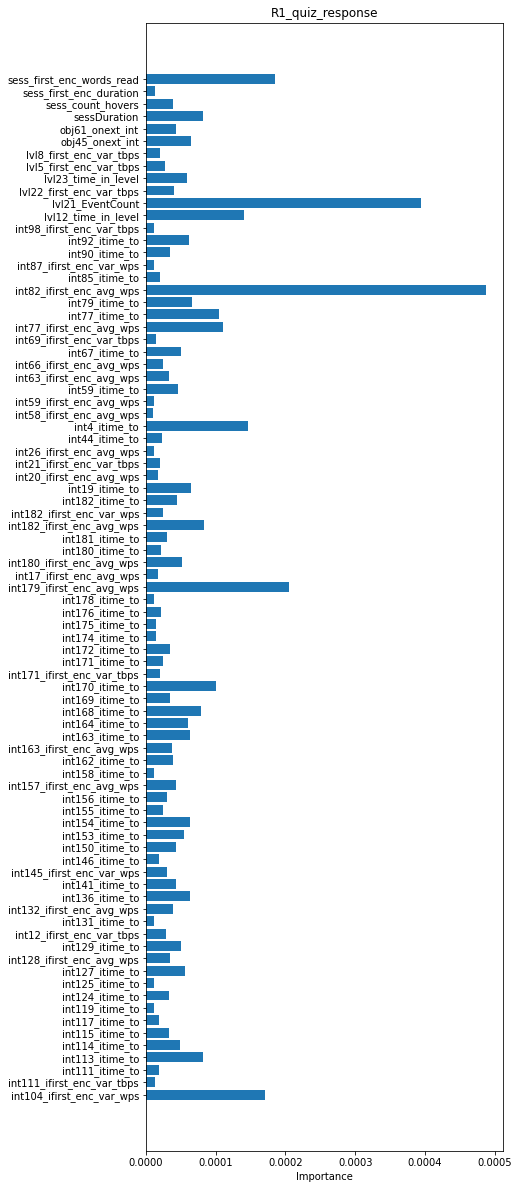

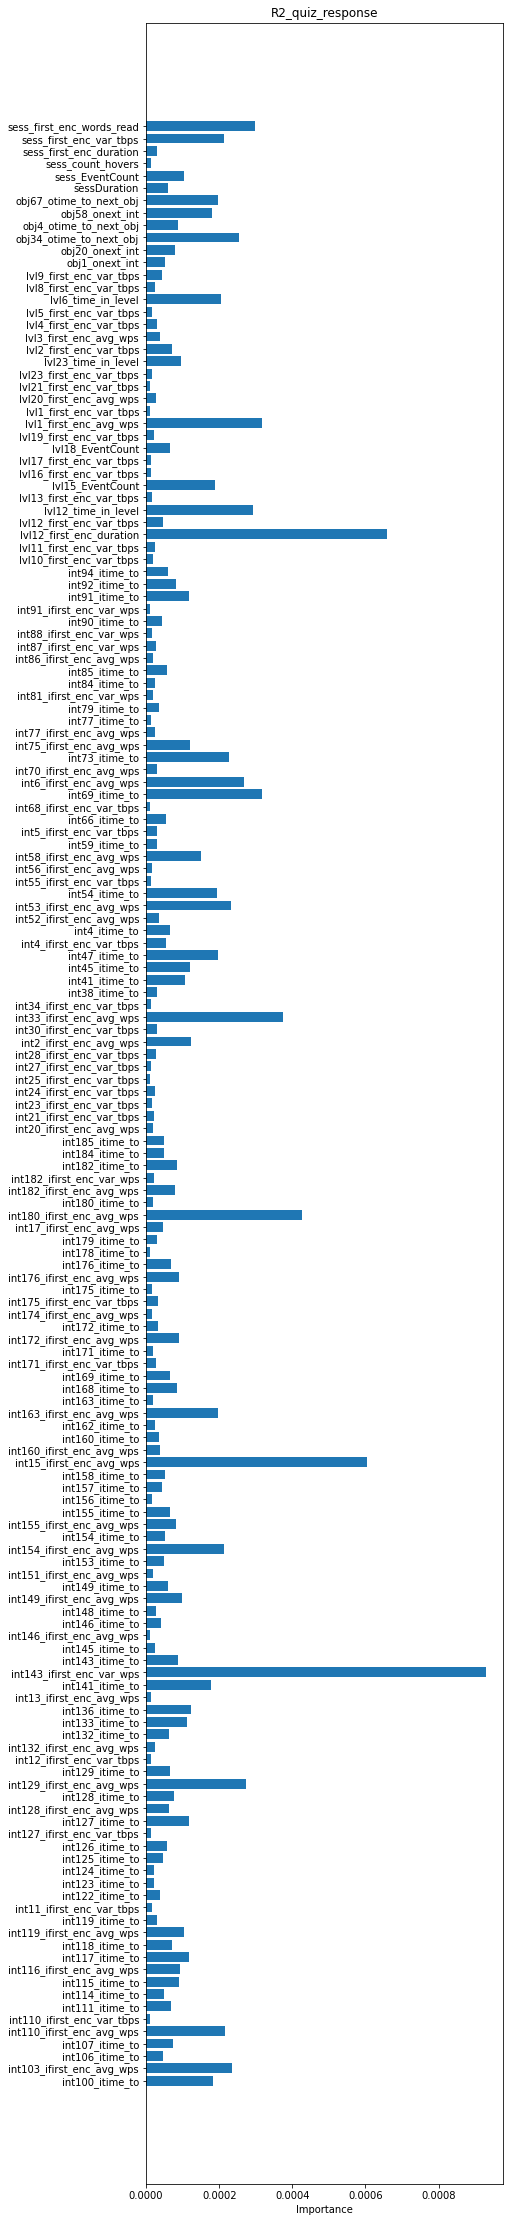

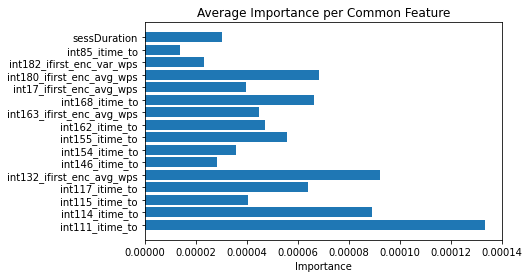

In [15]:
pre_test_results = [pre_test_results_R0, pre_test_results_R1, pre_test_results_R2]
raw_importances = [np.abs(results.coef_) for results in pre_test_results]
for i in range(len(pre_test_results)):
  print(f"greatest importance R{i}: {max(raw_importances[i])}")

selectors = [selector_R0, selector_R1, selector_R2]
feature_indices = [selector.get_support(indices=True) for selector in selectors]
features = [feat_detect_data.columns[indices] for indices in feature_indices]
importances = [raw_importances[i][feature_indices[i]] for i in range(len(selectors))]
# Now that we've got a bunch of lists ready, we just use them to make graphs
for i in range(len(selectors)):
  print(f"Number of features for predicting R{i}_quiz_response: {len(feature_indices[i])}")
  FeatureSuggestionPlot(features[i], importances[i], title=f"R{i}_quiz_response")

# *** Handle Common Features ***
# simple lambda expression to check whether an element is in all lists from a list of lists
in_index_sets = lambda elem, index_sets : sum([1 if elem in index_set else 0 for index_set in index_sets]) == len(index_sets)
common_feature_indices = [i for i in feature_indices[0] if in_index_sets(i, feature_indices[1:])]
print(f"Number of common features: {len(common_feature_indices)}")
if len(common_feature_indices) > 0:
  common_features = feat_detect_data.columns[common_feature_indices]
  common_importances = [[importances[j][i] for j in range(len(selectors))] for i in range(len(common_features)) ]
  mean = lambda vals : sum(vals) / len(vals)
  average_common_importances = [mean(importance_list) for importance_list in common_importances]
  print(f"Greatest average importance for common features: {max(average_common_importances)}")
  FeatureSuggestionPlot(common_features, average_common_importances, title=f"Average Importance per Common Feature")

### Optional: Select Level Features to Aggregate
Ignore the 'sess' and 'other' columns.<br>
Or choose to use hardcoded options

In [16]:
if not options: #options.lvlfeats is not None and options.lvlrange is not None:
    level_features_widget = feat_util.get_feat_selection(new_feat_df, session_prefix="sess", max_lvl=23, cc_prefix_max_list=feat_util.jw_cc_max)
    display(level_features_widget)

GridBox(children=(VBox(children=(Text(value='', description='Search lvl:', layout=Layout(width='400px')), VBox…

### Select final features

In [17]:
feat_util.get_range_feats_and_range(level_features_widget)

[([], range(0, 1)), ([], range(0, 1)), ([], range(0, 1)), ([], range(0, 1))]

In [18]:
if options:# and options.lvlfeats is not None and options.lvlrange is not None: 
    aggregate_df, aggregate_meta = feat_util.describe_lvl_feats(new_feat_df, options.lvlfeats, options.lvlrange)
else:
    range_feats_and_range = feat_util.get_range_feats_and_range(level_features_widget)
    aggregate_df, aggregate_meta = feat_util.des(range_feats_and_range, feat_util.jw_cc_max)
# if not options:# and options.finalfeats is not None:
    final_features_widget = feat_util.get_feat_selection(aggregate_df, session_prefix="sess", max_lvl=23, cc_prefix_max_list=feat_util.jw_cc_max)
    display(final_features_widget)
print(*aggregate_meta,sep='\n')

AttributeError: ignored

### Output final columns

In [0]:
if options: #None not in [options, options.finalfeats]:
    reduced_df, reduced_meta = feat_util.reduce_feats(aggregate_df, options.finalfeats)
else:
    final_feats = feat_util.get_selected_feature_list(final_features_widget, session_prefix="sess")
    reduced_df, reduced_meta = feat_util.reduce_feats(aggregate_df, final_feats)
print(*reduced_meta, sep='\n')
reduced_df

In [0]:
reduced_df.describe()

In [0]:
if not options:
    final_df, outlier_meta = feat_util.reduce_outliers(reduced_df, 3)
else:
    final_df, outlier_meta = feat_util.reduce_outliers(reduced_df, options.zthresh)
final_meta = import_meta + filter_meta + new_feat_meta + aggregate_meta + reduced_meta + outlier_meta
print(*final_meta, sep='\n')

In [0]:
feat_util.print_options(final_meta)

In [0]:
Workflow.Histogram(final_df, title='Feature Histogram')

In [0]:
Workflow.Correlations(final_df)

In [0]:
colors = {i: v for i, v in enumerate(plt.cm.get_cmap('tab10').colors)}
Workflow.scatter(final_df, [0]*len(final_df), color_dict=colors, title='Scatter')